In [1]:
import matplotlib.pyplot as plt
from decimal import Decimal
import numpy as np

In [2]:
from experiment.scenario import *
from experiment_setup.exp_utrecht_10_492_594_v2_setup import *

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# Setup

Check scenario settings:

In [3]:
# for i, ss in enumerate(scenario_settings):
#     print(str(i) + ": " + str(ss))

Set up experiment:

In [4]:
load_existing_experiment = True

if not load_existing_experiment:
    e = Experiment(experiment_name, experiment_dirpath, default_config, scenario_settings, scene_parts)

    print("\nSetting up experiment:")
    e.setup()
else:
    print("\nLoading existing experiment:")
    e = Experiment.load(experiment_dirpath / experiment_name, load_scenarios=True)


Loading existing experiment:

Loading experiment configuration ...
Initializing experiment ...
Loading scenarios ...
- 143 scenarios


# Try reconstruction with different parameter sets

In [ ]:
scenario_id = 0
e[scenario_id].setup_reconstruction_optimization()
e[scenario_id].recon_optim.load_optim_experiment()

In [ ]:
optim_scenario_id = 0
params = e[scenario_id].recon_optim.optim_experiment[optim_scenario_id].geoflow_parameters
print(json.dumps(params, indent=2, ensure_ascii=False))

In [ ]:
e[scenario_id].set_reconstruction_params(params)

In [ ]:
e[scenario_id].setup_reconstruction()
e[scenario_id].prepare_reconstruction()
e[scenario_id].run_reconstruction()

# Select best optimization scenario

In [ ]:
scenario_id = 49

In [ ]:
e[scenario_id].setup_reconstruction_optimization()

In [ ]:
e[scenario_id].recon_optim.load_optim_experiment()

In [ ]:
e[scenario_id].recon_optim.target_metric

In [ ]:
e[scenario_id].recon_optim.select_optimal_scenario()

## Rerun individual optimization scenarios

Mostly in cases where the Geoflow output is damaged.

In [ ]:
optim_id = 31
e[scenario_id].recon_optim.optim_experiment[optim_id].setup_reconstruction()
e[scenario_id].recon_optim.optim_experiment[optim_id].prepare_reconstruction()
e[scenario_id].recon_optim.optim_experiment[optim_id].run_reconstruction(add_geoflow_params=e[scenario_id].recon_optim.add_geoflow_params)

In [ ]:
e[scenario_id].recon_optim.optim_experiment[optim_id].setup_evaluation(lods=["2.2"])
e[scenario_id].recon_optim.optim_experiment[optim_id].run_evaluation(evaluator_selection="hausdorff")

# Check reconstruction optimization for multiple scenarios

## Rename optim experiment if necessary

In [ ]:
eo = Experiment.load(r"C:\Users\Florian\Data\city-to-scan-to-city\utrecht_10-492-594_v2\06_reconstruction_optimization\scenario_055")

In [ ]:
eo.rename("scenario_055_penalize_complexity_harder")

## Get names of best optim scenarios

For each scenario's optimization experiment, get the name of the optimization scenario (=iteration) that was found to be best. Requires that method ReconstructionOptimization.select_optimal_scenario() was executed at any point before.

In [ ]:
best_optim_scenario_names = [scenario.best_optim_scenario_name for scenario in e[:110]]
for scenario in e[:110]:
    print(f"{scenario.name}: {scenario.best_optim_scenario_name}")

In [ ]:
# So far only scenarios up to 109 were optimized, but optimization experiments up to 120 are loaded.
# This is to make the lists equally long.
best_optim_scenario_names.extend(["" for i in range(11)])
len(best_optim_scenario_names)

Distribution of the number of the optimization scenario that was selected as best among all iterations. 

In [ ]:
best_optim_scenario_numbers = [int(n[-4:]) for n in best_optim_scenario_names]
plt.hist(best_optim_scenario_numbers, bins=np.arange(0,75, 5))

## Load experiment & get summary stats

For any and all optimization scenarios that crashed, move their folders from the settings, reconstruction, and evaluation dirpaths of the optimization experiment to the graveyard directory.

In [5]:
import shutil
graveyard_dirpath = e.recon_optim_dirpath / "graveyard"
graveyard_dirpath.mkdir(exist_ok=True)
for j, eo in enumerate(eos):
    print(f"Optim experiment for scenario {j}")
    dirpaths = [eo.settings_dirpath, eo.reconstruction_dirpath, eo.evaluation_dirpath]
    for p in dirpaths:
        for f in p.iterdir():
            if f.is_dir() and "crash" in f.name:
                name_new = f"{eo.name}_{p.name}_{f.name}"
                print(f"Moving `{f.name}` to `{name_new}`")
                f = f.rename(f.parent / name_new)
                shutil.move(f, graveyard_dirpath)

Optim experiment for scenario 0
Optim experiment for scenario 1
Moving `optim_0002_crashed` to `scenario_001_02_settings_optim_0002_crashed`
Moving `optim_0009_crashed` to `scenario_001_02_settings_optim_0009_crashed`
Moving `optim_0002_crashed` to `scenario_001_07_reconstruction_optim_0002_crashed`
Moving `optim_0009_crashed` to `scenario_001_07_reconstruction_optim_0009_crashed`
Moving `optim_0002_crashed` to `scenario_001_08_evaluation_optim_0002_crashed`
Moving `optim_0009_crashed` to `scenario_001_08_evaluation_optim_0009_crashed`
Optim experiment for scenario 2
Optim experiment for scenario 3
Optim experiment for scenario 4
Moving `optim_0028_crashed_241006-193314` to `scenario_004_02_settings_optim_0028_crashed_241006-193314`
Moving `optim_0028_crashed_241006-193314` to `scenario_004_07_reconstruction_optim_0028_crashed_241006-193314`
Optim experiment for scenario 5
Optim experiment for scenario 6
Moving `optim_0021_crashed_241006-223500` to `scenario_006_02_settings_optim_0021_

In [6]:
import shutil
hospital_dirpath = e.recon_optim_dirpath / "hospital"
hospital_dirpath.mkdir(exist_ok=True)
for j, eo in enumerate(eos):
    print(f"Optim experiment for scenario {j}")
    dirpaths = [eo.settings_dirpath, eo.reconstruction_dirpath, eo.evaluation_dirpath]
    for p in dirpaths:
        for f in p.iterdir():
            if f.is_dir() and "broken" in f.name:
                name_new = f"scenario_{j:03}_{p.name}_{f.name}"
                print(f"Moving `{f.name}` to `{name_new}`")
                f = f.rename(f.parent / name_new)
                shutil.move(f, hospital_dirpath)

Optim experiment for scenario 0
Optim experiment for scenario 1
Optim experiment for scenario 2
Optim experiment for scenario 3
Optim experiment for scenario 4
Optim experiment for scenario 5
Optim experiment for scenario 6
Optim experiment for scenario 7
Optim experiment for scenario 8
Optim experiment for scenario 9
Optim experiment for scenario 10
Optim experiment for scenario 11
Optim experiment for scenario 12
Optim experiment for scenario 13
Optim experiment for scenario 14
Optim experiment for scenario 15
Optim experiment for scenario 16
Optim experiment for scenario 17
Optim experiment for scenario 18
Optim experiment for scenario 19
Optim experiment for scenario 20
Optim experiment for scenario 21


Load optimization experiments.

In [5]:
# Load optimization experiments

# eos = [
#     Experiment.load(r"C:\Users\Florian\Data\city-to-scan-to-city\utrecht_10-492-594_v2\06_reconstruction_optimization\scenario_055"),
#     Experiment.load(r"C:\Users\Florian\Data\city-to-scan-to-city\utrecht_10-492-594_v2\06_reconstruction_optimization\scenario_055_penalize_complexity"),
#     Experiment.load(r"C:\Users\Florian\Data\city-to-scan-to-city\utrecht_10-492-594_v2\06_reconstruction_optimization\scenario_055_penalize_complexity_harder")
# ]

# Load optimization experiments for all scenarios
# scenarios = [55, 56, 58]
scenarios = list(range(88, 110))

eos = []
for si in scenarios:
    print(f"\n{si}", end="")
    eos.append(Experiment.load(e[si].recon_optim_output_dirpath, load_scenarios=True))


88
Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...
- 51 scenarios

89
Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...
- 51 scenarios

90
Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...
- 51 scenarios

91
Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...
- 51 scenarios

92
Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...
- 51 scenarios

93
Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...
- 51 scenarios

94
Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading 

In [6]:
for eo in eos:
    eo.run_steps(Scenario.setup_evaluation, lods=["2.2"])


Running 'setup_evaluation' for optim_0000 ...

Finished 'setup_evaluation' for optim_0000 after 0:00:00.020022.

Running 'setup_evaluation' for optim_0001 ...

Finished 'setup_evaluation' for optim_0001 after 0:00:00.021015.

Running 'setup_evaluation' for optim_0002 ...

Finished 'setup_evaluation' for optim_0002 after 0:00:00.017966.

Running 'setup_evaluation' for optim_0003 ...

Finished 'setup_evaluation' for optim_0003 after 0:00:00.015172.

Running 'setup_evaluation' for optim_0004 ...

Finished 'setup_evaluation' for optim_0004 after 0:00:00.020997.

Running 'setup_evaluation' for optim_0005 ...

Finished 'setup_evaluation' for optim_0005 after 0:00:00.018964.

Running 'setup_evaluation' for optim_0006 ...

Finished 'setup_evaluation' for optim_0006 after 0:00:00.016007.

Running 'setup_evaluation' for optim_0007 ...

Finished 'setup_evaluation' for optim_0007 after 0:00:00.018029.

Running 'setup_evaluation' for optim_0008 ...

Finished 'setup_evaluation' for optim_0008 after

In [7]:
# Number of optimization scenarios in which Geoflow timed out for each optim experiment
for eo in eos:
    n_opt_sc = len(eo)
    n_timeout = len([s for s in eo.scenarios.values() if s.flag_no_recon_output])
    print(f"{eo.name}: {n_timeout} / {n_opt_sc}")

scenario_088: 0 / 51
scenario_089: 0 / 51
scenario_090: 0 / 51
scenario_091: 0 / 51
scenario_092: 0 / 51
scenario_093: 0 / 51
scenario_094: 0 / 51
scenario_095: 0 / 51
scenario_096: 0 / 51
scenario_097: 0 / 51
scenario_098: 1 / 51
scenario_099: 1 / 51
scenario_100: 0 / 51
scenario_101: 0 / 51
scenario_102: 0 / 51
scenario_103: 1 / 51
scenario_104: 3 / 51
scenario_105: 9 / 51
scenario_106: 4 / 51
scenario_107: 4 / 51
scenario_108: 4 / 51
scenario_109: 1 / 51


In [8]:
# Number of optimization scenarios in which zero buildings were reconstructed OR Geoflow timed out for each optim experiment
for eo in eos:
    n_opt_sc = len(eo)
    n_zero_buildings = len([s for s in eo.scenarios.values() if s.flag_zero_buildings_reconstructed])
    print(f"{eo.name}: {n_zero_buildings} / {n_opt_sc}")

scenario_088: 0 / 51
scenario_089: 0 / 51
scenario_090: 0 / 51
scenario_091: 0 / 51
scenario_092: 0 / 51
scenario_093: 0 / 51
scenario_094: 0 / 51
scenario_095: 0 / 51
scenario_096: 0 / 51
scenario_097: 0 / 51
scenario_098: 1 / 51
scenario_099: 1 / 51
scenario_100: 0 / 51
scenario_101: 0 / 51
scenario_102: 0 / 51
scenario_103: 1 / 51
scenario_104: 3 / 51
scenario_105: 9 / 51
scenario_106: 4 / 51
scenario_107: 4 / 51
scenario_108: 4 / 51
scenario_109: 1 / 51


In [ ]:
# Update older optimization scenarios with the path to the input geopackage building models file
for eo in eos:
    eo.default_config["evaluation_config"]["input_geopackage_filepath"] = str(input_dirpath / "GPKG" / "10-492-594.gpkg")
    for name, scenario in eo.scenarios.items():
        scenario.config["evaluation_config"]["input_geopackage_filepath"] = str(input_dirpath / "GPKG" / "10-492-594.gpkg")
    eo.save()

In [ ]:
# Run additional evaluator to check their results. They may already have been run while running ReconstructionOptimization.select_optimal_scenario().
for eo in eos:
    eo.run_steps(Scenario.run_evaluation, evaluator_selection=["complexity", "complexity_diff", "geoflow_output"])


Running 'run_evaluation' for optim_0000 ...

Starting ComplexityEvaluator ...

Counting faces for LOD 2.2 ...

Finished ComplexityEvaluator after 0:00:00.247121.

Starting ComplexityDifferenceEvaluator ...

Starting ComplexityEvaluator ...

Counting faces for LOD 2.2 ...

Finished ComplexityEvaluator after 0:00:04.415603.

Evaluation results for complexity evaluator 2 already exist. Will not reevaluate.

Finished ComplexityDifferenceEvaluator after 0:00:04.499614.

Starting GeoflowOutputEvaluator ...

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.195057.

Starting CityJSONBuildingsEvaluator ...

Finished CityJSONBuildingsEvaluator after 0:00:00.244596.

Starting WavefrontOBJBuildingsEvaluator ...

Finished WavefrontOBJBuildingsEvaluator after 0:00:00.219049.

Finished GeoflowOutputEvaluator after 0:00:00.664699.

Finished 'run_evaluation' for optim_0000 after 0:00:05.412436.

Running 'run_evaluation' for optim_0001 ...

Starting Complex

In [71]:
# Compute summary statistics for the evaluators whose results are available
for eo in eos:
    # eo.compute_summary_statistics(evaluator_selection=["hausdorff", "complexity", "iou_3d", "geoflow_output"], ignore_missing=True)
    eo.compute_summary_statistics(evaluator_selection=["hausdorff", "complexity", "complexity_diff", "geoflow_output"], ignore_missing=True)


Computing summary statistics of 51 scenarios ...

Missing output for evaluator `hausdorff` in scenario `optim_0019` ignored.

Computing summary statistics of 51 scenarios ...

Computing summary statistics of 51 scenarios ...

Computing summary statistics of 51 scenarios ...

Computing summary statistics of 51 scenarios ...

Computing summary statistics of 51 scenarios ...

Computing summary statistics of 51 scenarios ...

Computing summary statistics of 50 scenarios ...

Computing summary statistics of 51 scenarios ...

Computing summary statistics of 51 scenarios ...

Computing summary statistics of 50 scenarios ...

Computing summary statistics of 51 scenarios ...

Computing summary statistics of 51 scenarios ...

Computing summary statistics of 51 scenarios ...

Computing summary statistics of 51 scenarios ...

Computing summary statistics of 51 scenarios ...

Computing summary statistics of 51 scenarios ...

Computing summary statistics of 51 scenarios ...

Computing summary stati

In [6]:
# If summary stats were computed previously, this will simply load the values
ss = [eo.summary_stats for eo in eos]

Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistics from file 'summary_statistics.csv'...
Loading summary statistic

In [ ]:
# Create a column that indicates the scenario with the "best" params
# (as integer, so it can be used to color dots in plots)
for i in range(len(ss)):
    ss[i]["is_best"] = (ss[i].index == best_optim_scenario_names[i]).astype(int)

In [ ]:
# Create a column that indicates the scenarios that are not worse by more than a certain amount than the best target metric value
for i in range(len(ss)):
    ss[i]["best_pct"] = (ss[i]["rms_min_dist_22_mean"] <= 1.2 * ss[i]["rms_min_dist_22_mean"].min()).astype(int)

## Compute rankings

In [7]:
def compute_metric_ranks(s: pd.DataFrame):
    # -------------------------------------------------------------------------------------
    # Compute ranks for quality metric columns
    rank_columns = ["rms_min_dist_22_mean", "hausdorff_22_rms", "n_faces_22_mean", "n_faces_22_abs_diff_mean", "n_faces_22_norm_abs_diff_mean", "iou_22_mean"]
    ascending = [True, True, True, True, True, False]
    
    rank_columns = [(c, a) for c, a in zip(rank_columns, ascending) if c in s.columns]
    
    for c, a in rank_columns:
        s["rank_" + c] = s[c].rank(ascending=a)
    
    rank_sum_columns = ["rank_rms_min_dist_22_mean", "rank_n_faces_22_mean", "rank_iou_22_mean"]
    rank_sum_column_weights = [0.75, 1.5, 0.75]  # equals [1, 2, 1] in effect, but makes absolute values comparable to unweighted rank (sum of 3)
    
    rank_sum_column_weights = [(c, w) for c, w in zip(rank_sum_columns, rank_sum_column_weights) if c in s.columns] 
    rank_sum_columns = [c for c in rank_sum_columns if c in s.columns]

    # Sum up the ranks (except Hausdorff) to be able to pick the best performing on average
    s["rank_sum"] = s[rank_sum_columns].sum(axis=1).rank()  # sum up the rank values across the columns
    
    # Sum up the ranks, weighting the number of faces twice as much as the other two
    s["rank_sum_weighted"] = pd.DataFrame.from_dict({c: w * s[c] for c, w in rank_sum_column_weights}).sum(axis=1).rank()
    
    # -------------------------------------------------------------------------------------
    # Compute ranks based on value ranges of the quality metrics
    for c, a in rank_columns:
        if a:
            s["rangerank_" + c] = (s[c] - s[c].min()) / (s[c].max() - s[c].min())
        else:
            s["rangerank_" + c] = (s[c].max() - s[c]) / (s[c].max() - s[c].min())
    
    rangerank_sum_columns = ["rangerank_rms_min_dist_22_mean", "rangerank_n_faces_22_mean", "rangerank_iou_22_mean"]
    rangerank_sum_column_weights = [0.75, 1.5, 0.75]  # equals [1, 2, 1] in effect, but makes absolute values comparable to unweighted rank (sum of 3)
    
    rangerank_sum_column_weights = [(c, w) for c, w in zip(rangerank_sum_columns, rangerank_sum_column_weights) if c in s.columns]
    rangerank_sum_columns = [c for c in rangerank_sum_columns if c in s.columns]
    
    s["rangerank_sum"] = s[rangerank_sum_columns].sum(axis=1)  # sum up the rank values across the columns
    
    # Sum up the ranks, weighting the number of faces twice as much as the other two
    
    s["rangerank_sum_weighted"] = pd.DataFrame.from_dict({c: w * s[c] for c, w in rangerank_sum_column_weights}).sum(axis=1)
    
    return s

In [8]:
for i in range(len(ss)):
    ss[i] = compute_metric_ranks(ss[i])

In [9]:
relevant_columns = [
    "is_best",
    "target_density",
    "error_level",
    
    "rms_min_dist_22_mean",
    "hausdorff_22_rms",
    "n_faces_22_mean",
    "n_faces_22_abs_diff_mean",
    "n_faces_22_norm_abs_diff_mean",
    "iou_22_mean",
    
    "rank_rms_min_dist_22_mean",
    "rank_hausdorff_22_rms",
    "rank_n_faces_22_mean",
    # "rank_n_faces_22_abs_diff_mean",
    # "rank_n_faces_22_norm_abs_diff_mean",
    "rank_iou_22_mean",
    "rank_sum",
    "rank_sum_weighted",
    
    "rangerank_rms_min_dist_22_mean",
    "rangerank_hausdorff_22_rms",
    "rangerank_n_faces_22_mean",
    # "rangerank_n_faces_22_abs_diff_mean",
    # "rangerank_n_faces_22_norm_abs_diff_mean",
    "rangerank_iou_22_mean",
    "rangerank_sum",
    "rangerank_sum_weighted"
]
relevant_columns_by_metric = [
    "rank_sum",
    "rank_sum_weighted",
    "rms_min_dist_22_mean",
    "rank_rms_min_dist_22_mean",
    "rangerank_rms_min_dist_22_mean",
    "iou_22_mean",
    "rank_iou_22_mean",
    "rangerank_iou_22_mean",
    "n_faces_22_mean",
    "rank_n_faces_22_mean",
    "rangerank_n_faces_22_mean",
    "hausdorff_22_rms",
    "rank_hausdorff_22_rms",
    "rangerank_hausdorff_22_rms",
    "rangerank_sum",
    "rangerank_sum_weighted",
]

In [10]:
relevant_columns = [c for c in relevant_columns if c in ss[0].columns]

In [41]:
# Get summary statistics (describe()) across all optimization scenarios of each optimization experiment
for s in ss:
    relevant_columns = [c for c in relevant_columns if c in s.columns]
    relevant_columns_by_metric = [c for c in relevant_columns_by_metric if c in s.columns]
    display(s.loc[:, relevant_columns].describe())

,rms_min_dist_22_mean,hausdorff_22_rms,n_faces_22_mean,n_faces_22_abs_diff_mean,n_faces_22_norm_abs_diff_mean,rank_rms_min_dist_22_mean,rank_hausdorff_22_rms,rank_n_faces_22_mean,rank_sum,rank_sum_weighted,rangerank_rms_min_dist_22_mean,rangerank_hausdorff_22_rms,rangerank_n_faces_22_mean,rangerank_sum,rangerank_sum_weighted
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.159763,1.796714,208.332429,96.962611,1.184917,101.000000,101.000000,101.00000,101.000000,101.000000,0.168605,0.234386,0.506925,0.675530,0.886841
std,0.085008,0.549664,35.976919,32.655057,0.292774,58.167861,58.167861,58.16771,58.156706,58.165948,0.260468,0.228155,0.196682,0.158837,0.183685
min,0.104736,1.232039,115.606061,25.585859,0.335062,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.436811,0.612839
25%,0.111808,1.510347,194.929293,82.383838,1.094588,51.000000,51.000000,51.00000,51.000000,51.500000,0.021668,0.115520,0.433652,0.529515,0.733156
50%,0.116605,1.552503,207.636364,94.343434,1.174171,101.000000,101.000000,101.00000,104.000000,100.500000,0.036365,0.133019,0.503120,0.661064,0.820738
75%,0.159576,1.775359,233.373737,121.010101,1.408390,151.000000,151.000000,151.00000,151.000000,151.000000,0.168030,0.225522,0.643824,0.785615,1.026763
max,0.431102,3.641203,298.525253,185.232323,1.815859,201.000000,201.000000,201.00000,201.000000,201.000000,1.000000,1.000000,1.000000,1.136876,1.513341


,rms_min_dist_22_mean,hausdorff_22_rms,n_faces_22_mean,n_faces_22_abs_diff_mean,n_faces_22_norm_abs_diff_mean,rank_rms_min_dist_22_mean,rank_hausdorff_22_rms,rank_n_faces_22_mean,rank_sum,rank_sum_weighted,rangerank_rms_min_dist_22_mean,rangerank_hausdorff_22_rms,rangerank_n_faces_22_mean,rangerank_sum,rangerank_sum_weighted
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.157205,1.778331,212.475753,101.327554,1.218746,101.000000,101.000000,101.000000,101.000000,101.000000,0.135279,0.224943,0.541465,0.676744,0.913656
std,0.082569,0.521880,38.456757,34.580858,0.308169,58.167861,58.167861,58.167818,58.160575,58.165626,0.211266,0.222987,0.187133,0.127689,0.180644
min,0.104334,1.251873,101.202020,25.575758,0.342718,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.458687,0.626434
25%,0.111305,1.499454,194.040404,81.373737,1.089031,51.000000,51.000000,51.000000,51.000000,50.500000,0.017837,0.105785,0.451757,0.555237,0.765172
50%,0.116493,1.552472,210.262626,96.969697,1.206532,101.000000,101.000000,101.000000,101.000000,101.000000,0.031113,0.128439,0.530696,0.693247,0.880718
75%,0.151879,1.816315,242.707071,129.414141,1.469344,151.000000,151.000000,151.000000,150.000000,151.000000,0.121654,0.241173,0.688572,0.757894,1.047628
max,0.495161,3.592277,306.707071,193.414141,1.894534,201.000000,201.000000,201.000000,201.000000,201.000000,1.000000,1.000000,1.000000,1.004343,1.500510


,rms_min_dist_22_mean,hausdorff_22_rms,n_faces_22_mean,n_faces_22_abs_diff_mean,n_faces_22_norm_abs_diff_mean,rank_rms_min_dist_22_mean,rank_hausdorff_22_rms,rank_n_faces_22_mean,rank_sum,rank_sum_weighted,rangerank_rms_min_dist_22_mean,rangerank_hausdorff_22_rms,rangerank_n_faces_22_mean,rangerank_sum,rangerank_sum_weighted
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.174443,2.018230,198.168903,87.566561,1.103516,101.000000,101.000000,101.000000,101.000000,101.000000,0.074989,0.029050,0.531407,0.606397,0.853353
std,0.105924,1.766904,34.799460,30.339753,0.292357,58.167861,58.167861,58.167753,58.162445,58.164744,0.117836,0.072486,0.199372,0.135163,0.239708
min,0.107035,1.310105,105.414141,25.696970,0.320543,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.362872,0.272154
25%,0.114893,1.550042,180.000000,68.383838,1.003187,51.000000,51.000000,51.000000,51.500000,50.000000,0.008742,0.009843,0.427315,0.530769,0.735759
50%,0.121245,1.601739,200.686869,87.393939,1.135655,101.000000,101.000000,101.500000,102.000000,101.000000,0.015808,0.011964,0.545833,0.581012,0.836987
75%,0.201615,2.096322,216.424242,103.131313,1.223487,151.000000,151.000000,151.000000,151.000000,150.500000,0.105217,0.032254,0.635995,0.675612,0.975752
max,1.005946,25.686027,279.959596,166.666667,1.693443,201.000000,201.000000,201.000000,201.000000,201.000000,1.000000,1.000000,1.000000,1.195718,1.511014


In [ ]:
ss[109].loc[:, [c for c in relevant_columns if c in ss[0].columns]].describe()

In [ ]:
ss[0].describe()

## Best results in target metric(s)

In [ ]:
# The best performing parameter set was stored in the parent scenario's reconstruction config.
# (They may have been overwritten if the parent scenario or experiment was setup and saved newly.)
e[55].config["reconstruction_config"]["geoflow_parameters"], e[58].config["reconstruction_config"]["geoflow_parameters"]

In [ ]:
def get_best_results(s: pd.DataFrame):
    columns = []
    columns.extend(["iou_22_mean", "rank_iou_22_mean"])
    columns.extend(["hausdorff_22_rms", "rank_hausdorff_22_rms"])
    columns.extend(["rms_min_dist_22_mean", "rank_rms_min_dist_22_mean"])
    columns.extend(["n_faces_22_mean", "rank_n_faces_22_mean"])
    columns.extend(["n_faces_22_std"])
    columns.extend(["gpkg_unique_22"])
    # columns.extend(["area_22_mean_abs_diff"])
    columns.extend(list(glb.geoflow_parameters_default.keys()))
    
    # return s[(s["hausdorff_22_rms"] == min(s["hausdorff_22_rms"])) | (s["rms_min_dist_22_mean"] == min(s["rms_min_dist_22_mean"]))][columns]
    return s[(s["iou_22_mean"] == max(s["iou_22_mean"])) | (s["hausdorff_22_rms"] == min(s["hausdorff_22_rms"])) | (s["rms_min_dist_22_mean"] == min(s["rms_min_dist_22_mean"]))][columns]

display(get_best_results(ss[0]))
display(get_best_results(ss[1]))

## Individual scenarios: Tables

### Results for each scenario for the optimization scenario using Geoflow default parameters.

In [ ]:
pd.concat([s.loc["optim_0000", ["target_density", "std_horizontal_error", *relevant_columns]] for s in ss], axis=1).transpose()

### Top quantiles

Get all optim scenarios for which the target metric (rms min dist) is below a certain quantile.

In [ ]:
s = ss[0]
s[s.rms_min_dist_22_mean < s.rms_min_dist_22_mean.quantile(q=0.05)].loc[:, relevant_columns]

Get all optim scenarios for which the target metric (rms min dist) does not exceed the optimum target metric value by more than `threshold_ratio` times the range of target metric values (i.e., target metric maximum minus minimum).

In [11]:
s = ss[87]
threshold_ratio = 1.1  # 0.03
s[
    s.rms_min_dist_22_mean < (
            s.rms_min_dist_22_mean.min() + threshold_ratio*(s.rms_min_dist_22_mean.max() - s.rms_min_dist_22_mean.min())
    )
].loc[:, relevant_columns]

,target_density,error_level,rms_min_dist_22_mean,hausdorff_22_rms,n_faces_22_mean,n_faces_22_abs_diff_mean,n_faces_22_norm_abs_diff_mean,rank_rms_min_dist_22_mean,rank_hausdorff_22_rms,rank_n_faces_22_mean,rank_sum,rank_sum_weighted,rangerank_rms_min_dist_22_mean,rangerank_hausdorff_22_rms,rangerank_n_faces_22_mean,rangerank_sum,rangerank_sum_weighted
name,,,,,,,,,,,,,,,,,
optim_0000,22.627417,1.0,0.692546,4.263764,307.653061,199.571429,1.998664,51.0,50.0,2.0,24.5,13.0,1.000000,0.073537,0.102283,1.102283,0.903424
optim_0001,22.627417,1.0,0.398731,2.870029,984.909091,871.616162,6.563676,43.0,44.0,18.0,38.5,24.5,0.148030,0.021346,0.595032,0.743062,1.003570
optim_0002,22.627417,1.0,0.616473,3.834374,167.071429,74.622449,0.837550,49.0,49.0,1.0,21.0,10.5,0.779412,0.057457,0.000000,0.779412,0.584559
optim_0003,22.627417,1.0,0.407216,2.930391,451.444444,338.151515,2.580501,45.0,45.0,3.0,19.0,10.5,0.172635,0.023606,0.206900,0.379535,0.439827
optim_0004,22.627417,1.0,0.417758,2.988299,986.939394,873.646465,6.768452,47.0,47.0,19.0,42.0,29.0,0.203205,0.025774,0.596509,0.799714,1.047167
optim_0005,22.627417,1.0,0.363545,2.592757,1465.171717,1351.878788,9.172606,12.0,18.0,49.0,38.5,42.0,0.046003,0.010963,0.944455,0.990458,1.451185
optim_0006,22.627417,1.0,0.367142,2.496118,1022.010101,908.717172,6.701726,17.0,7.0,22.0,12.0,20.5,0.056434,0.007344,0.622025,0.678459,0.975363
optim_0007,22.627417,1.0,0.382987,2.631845,1041.545455,928.252525,6.740004,36.0,27.0,23.0,35.5,28.0,0.102379,0.012426,0.636239,0.738617,1.031142
optim_0008,22.627417,1.0,0.369993,2.569635,1243.696970,1130.404040,7.632503,19.0,13.0,35.0,27.5,32.5,0.064701,0.010097,0.783317,0.848019,1.223502


In [ ]:
s[~s.iou_22_mean.isna()].loc[:, ["r_plane_epsilon", "r_plane_min_points", *relevant_columns]]

# Best optimization scenarios

In [ ]:
best_optim_scenarios = pd.concat(
    [ss[i].loc[best_optim_scenario_names[i], ["target_density", "error_level", *relevant_columns]] for i in range(110)],
    axis=1,
    keys=zip(range(110), best_optim_scenario_names[:110])
).transpose()
best_optim_scenarios["error_level"] = best_optim_scenarios.std_horizontal_error.apply(lambda x: Decimal(str(np.round(x, decimals=1))))

In [ ]:
best_optim_scenarios.loc[[i*11-1 for i in range(1,10)], :]

In [ ]:
best_optim_scenarios[88:99].plot.scatter("rms_min_dist_22_mean", "n_faces_22_mean", c="error_level", colormap="tab10")

In [ ]:
best_optim_scenarios.loc[[i*11+0 for i in range(10)], :].plot.scatter("rms_min_dist_22_mean", "n_faces_22_mean", c="target_density", colormap="viridis")

## Optimization statistics plots

What are the metrics in terms of mean, minimum, maximum, across all optimization scenarios of each point cloud scenario?

In [77]:
opt_results_min = pd.concat(
    [s.describe().loc["min", ["target_density", "error_level", *relevant_columns]] for s in ss],
    axis=1,
).transpose()
opt_results_mean = pd.concat(
    [s.describe().loc["mean", ["target_density", "error_level", *relevant_columns]] for s in ss],
    axis=1,
).transpose()
opt_results_max = pd.concat(
    [s.describe().loc["max", ["target_density", "error_level", *relevant_columns]] for s in ss],
    axis=1,
).transpose()

In [79]:
opt_results_mean["error_level"] = opt_results_mean.error_level.apply(lambda x: Decimal(str(np.round(x, decimals=1))))
opt_results_min["error_level"] = opt_results_min.error_level.apply(lambda x: Decimal(str(np.round(x, decimals=1))))
opt_results_max["error_level"] = opt_results_max.error_level.apply(lambda x: Decimal(str(np.round(x, decimals=1))))

In [78]:
opt_results_min_rms_dist = pd.concat(
    [ss[i].loc[
         ss[i]["rms_min_dist_22_mean"].idxmin(),
         ["target_density", "error_level", *relevant_columns]
     ] for i in range(len(ss))],
    axis=1,
).transpose()
opt_results_min_rms_dist["error_level"] = opt_results_min_rms_dist.error_level.apply(lambda x: Decimal(str(np.round(x, decimals=1))))

In [ ]:
for error_lvl in opt_results_mean.std_horizontal_error.unique():
    print(Decimal(str(np.round(error_lvl, decimals=1))))

In [51]:
opt_results_mean.error_level.unique()

array([Decimal('0.0'), Decimal('0.1'), Decimal('0.2'), Decimal('0.3'),
       Decimal('0.4'), Decimal('0.5'), Decimal('0.6'), Decimal('0.7'),
       Decimal('0.8'), Decimal('0.9'), Decimal('1.0')], dtype=object)

Text(0.5, 1.0, 'Face number per building:\nMaximum across 50 optimization scenarios of\nmean across 100 buildings')

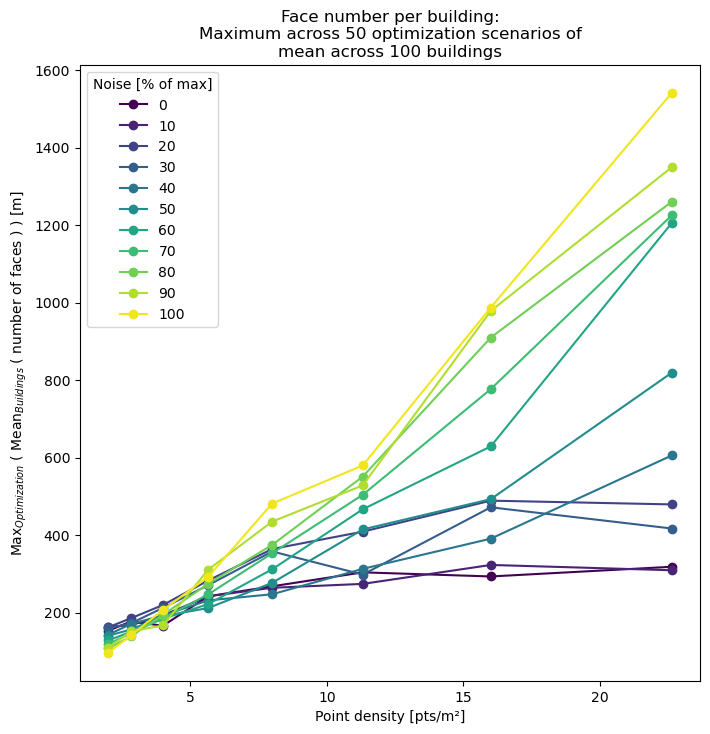

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
cmap = plt.get_cmap("viridis")
for i, error_lvl in enumerate(opt_results_max.error_level.unique()):
    df_slice = opt_results_max[opt_results_max.error_level == error_lvl]
    ax.plot(df_slice["target_density"], df_slice["n_faces_22_mean"], label=str(int(error_lvl * 100)), marker="o", color=cmap(i * 25))
plt.legend(title="Noise [% of max]")
plt.xlabel("Point density [pts/m²]")
plt.ylabel("Max$_{Optimization}$ ( Mean$_{Buildings}$ ( number of faces ) ) [m]")
plt.title("Face number per building:\nMaximum across 50 optimization scenarios of\nmean across 100 buildings")
    # opt_results_mean[opt_results_mean.std_horizontal_error == d].plot("target_density", "n_faces_22_mean")

Text(0.5, 1.0, 'Face number per building:\nMaximum across 50 optimization scenarios of\nmean across 100 buildings')

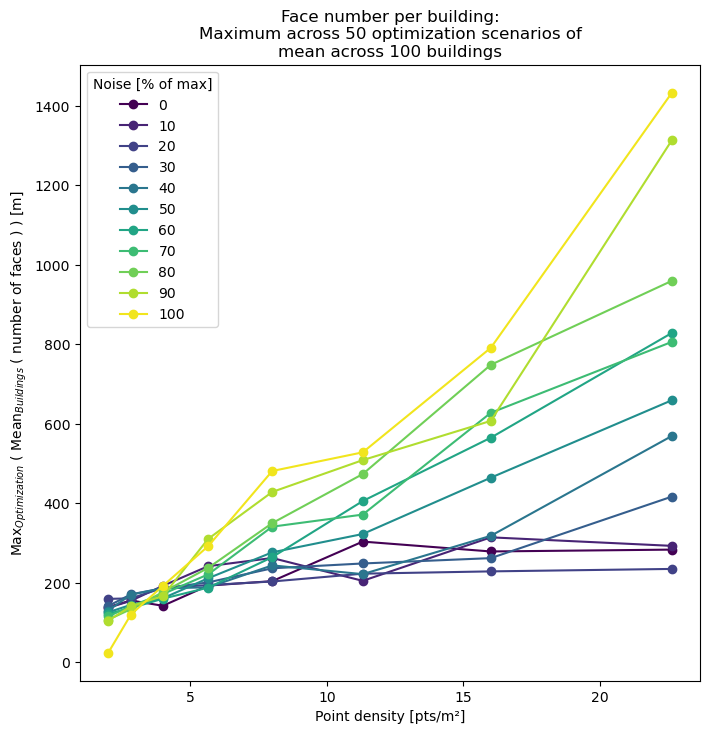

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
cmap = plt.get_cmap("viridis")
for i, error_lvl in enumerate(opt_results_min_rms_dist.error_level.unique()):
    df_slice = opt_results_min_rms_dist[(opt_results_min_rms_dist.error_level == error_lvl) & (opt_results_min_rms_dist.target_density < 33)]
    ax.plot(df_slice["target_density"], df_slice["n_faces_22_mean"], label=str(int(error_lvl * 100)), marker="o", color=cmap(i * 25))
plt.legend(title="Noise [% of max]")
plt.xlabel("Point density [pts/m²]")
plt.ylabel("Max$_{Optimization}$ ( Mean$_{Buildings}$ ( number of faces ) ) [m]")
plt.title("Face number per building:\nMaximum across 50 optimization scenarios of\nmean across 100 buildings")
    # opt_results_mean[opt_results_mean.std_horizontal_error == d].plot("target_density", "n_faces_22_mean")

Text(0.5, 1.0, 'RMS minimum distance:\nMinimum across 50 optimization scenarios of\nmean across 100 buildings')

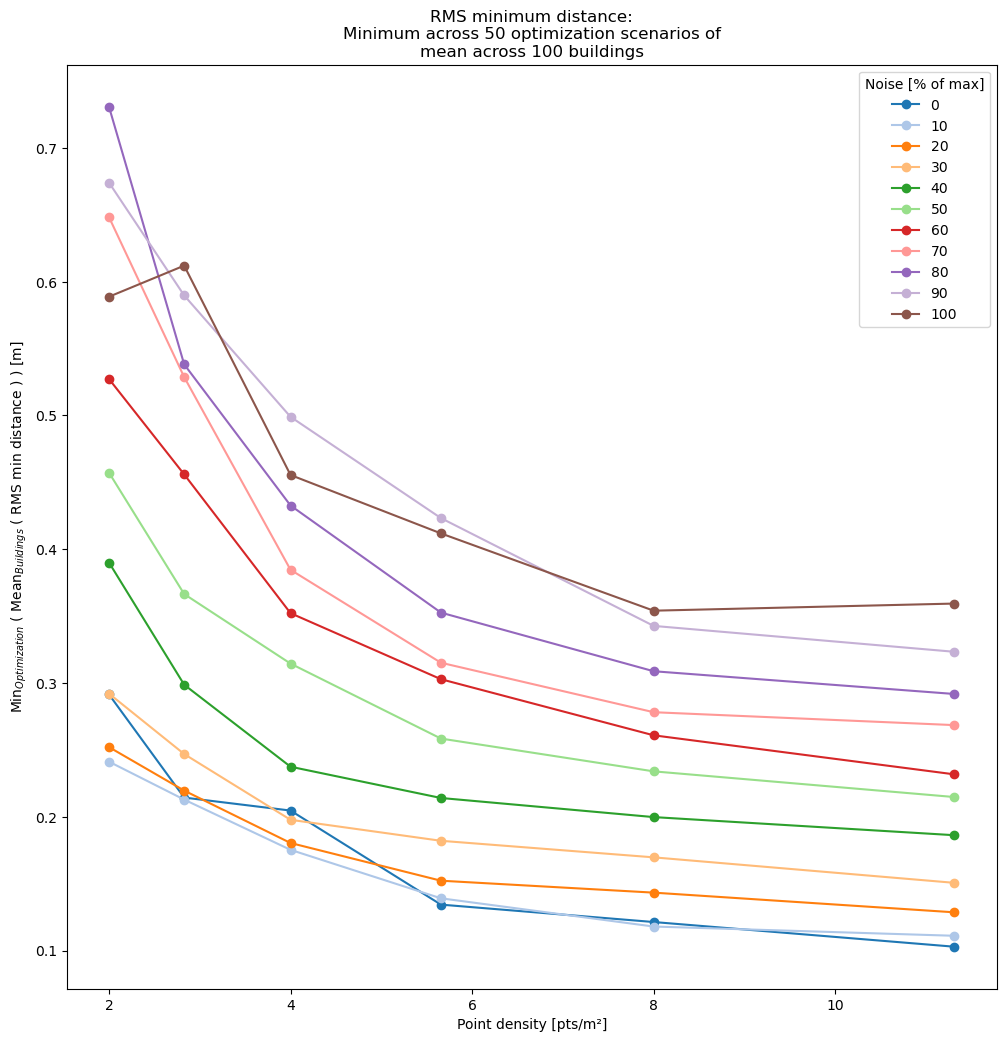

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
cmap = plt.get_cmap("tab20")
for i, error_lvl in enumerate(opt_results_min_rms_dist.error_level.unique()):
    df_slice = opt_results_min_rms_dist[(opt_results_min_rms_dist.error_level == error_lvl) & (opt_results_min_rms_dist.target_density < 15)]
    ax.plot(df_slice["target_density"], df_slice["rms_min_dist_22_mean"], label=str(int(error_lvl * 100)), marker="o", color=cmap(i))
plt.legend(title="Noise [% of max]")
plt.xlabel("Point density [pts/m²]")
plt.ylabel("Min$_{Optimization}$ ( Mean$_{Buildings}$ ( RMS min distance ) ) [m]")
plt.title("RMS minimum distance:\nMinimum across 50 optimization scenarios of\nmean across 100 buildings")
    # opt_results_mean[opt_results_mean.std_horizontal_error == d].plot("target_density", "n_faces_22_mean")

### Some related stuff and correlations

Trying to see if the combined RMS min and Hausdorff dist as ranked are more closely correlated to IOU. Turns out, they're not.

In [ ]:
s["rank_sum_hausdorff_rmsmindist"] = s[["rank_rms_min_dist_22_mean", "rank_hausdorff_22_rms"]].sum(axis=1).rank()

In [ ]:
s.plot.scatter("rank_sum_hausdorff_rmsmindist", "rank_iou_22_mean")

Correlations between target metrics in terms of their actual values and their ranks.

In [ ]:
s.plot.scatter("rms_min_dist_22_mean", "hausdorff_22_rms")#,  c="iou_22_mean", colormap="coolwarm")

# s.plot.scatter("rank_rms_min_dist_22_mean", "rank_hausdorff_22_rms",  c="rank_iou_22_mean", colormap="coolwarm")
# s.plot.scatter("rank_rms_min_dist_22_mean", "rank_iou_22_mean",  c="rank_hausdorff_22_rms", colormap="coolwarm")
# s.plot.scatter("rank_hausdorff_22_rms", "rank_iou_22_mean",  c="rank_rms_min_dist_22_mean", colormap="coolwarm")

s.plot.scatter("rank_rms_min_dist_22_mean", "rank_n_faces_22_mean")
s.plot.scatter("rms_min_dist_22_mean", "n_faces_22_mean")
# s.plot.scatter("rank_iou_22_mean", "rank_n_faces_22_mean")

Same, but only looking at the best scenarios in terms of the range threshold.

In [ ]:
s[s.rms_min_dist_22_mean < (s.rms_min_dist_22_mean.min() + threshold_ratio*(s.rms_min_dist_22_mean.max() - s.rms_min_dist_22_mean.min()))].loc[:, ["rms_min_dist_22_mean", "n_faces_22_mean"]].plot.scatter("n_faces_22_mean", "rms_min_dist_22_mean")

## Face number distribution

Looking more closely at the distribution of the number of faces, and the scenarios with the least number of faces on average

In [ ]:
s[s.n_faces_22_mean < s.n_faces_22_mean.quantile(q=0.1)].loc[:, relevant_columns]

In [ ]:
id_first, id_last = 83, 85
scenario_ids = [id_first+i for i in range(0, 1+id_last-id_first)]
plt.hist([s.n_faces_22_mean for s in ss[id_first:(id_last+1)]])
plt.legend(scenario_ids)  # ["55", "56", "58"])
plt.show()

In [ ]:
s = ss[109]
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
# ax[0].scatter(range(s.shape[0]), s["iou_22_mean"])
ax[1].scatter(range(s.shape[0]), s["hausdorff_22_rms"])
ax[2].scatter(range(s.shape[0]), s["rms_min_dist_22_mean"])
# plt.legend(["iou_22_mean", "hausdorff_22_rms", "rms_min_dist_22_mean"])
# plt.legend(["hausdorff_22_rms", "rms_min_dist_22_mean"])
# plt.ylim(.2, 0.95)
plt.show()

## Plotting functions

In [ ]:
opt_params = [m.split("_", 1)[1] for m in glb.geoflow_optim_parameter_space_narrow.keys()]

def plot_metric_vs_parameter(es: list[Experiment] | Experiment, target_metric: str):
    if isinstance(es, Experiment):
        es = [es]
    stats = [e.summary_stats for e in es]
    nrows, ncols = len(opt_params), len(stats)
    fig, axs = plt.subplots(nrows, ncols, figsize=(6*ncols, 4.5*nrows), sharey="all", layout="constrained")
    
    for i, opt_param in enumerate(opt_params):
        for j, s in enumerate(stats):
            if ncols == 1:
                ax = axs[i]
            else:
                ax = axs[i, j]
            s.plot.scatter(opt_param, target_metric, ax=ax)
            if i == 0:
                ax.set_title(es[j].name)
    
    plt.show()

In [ ]:
def plot_metric_vs_metric(es: list[Experiment] | Experiment, x, ys):
    if isinstance(es, Experiment):
        es = [es]
    if isinstance(ys, str):
        ys = [ys]
    stats = [e.summary_stats for e in es]
    nrows, ncols = len(ys), len(stats)
    fig, axs = plt.subplots(nrows, ncols, figsize=(6*ncols, 4.5*nrows), sharey="row", sharex="row", layout="constrained")
    
    for i, y in enumerate(ys):
        for j, s in enumerate(stats):
            if ncols == 1:
                ax = axs[i]
            else:
                if nrows == 1:
                    ax = axs[j]
                else:
                    ax = axs[i, j]
            s.plot.scatter(x, y, ax=ax)
            if i == 0:
                ax.set_title(es[j].name)
    
    plt.show()

In [83]:
def plot_metric_vs_metric_2(es: list[Experiment] | Experiment, xs, ys, sharex=None, sharey="row", **kwargs):
    if isinstance(es, Experiment):
        es = [es]
    if isinstance(xs, str):
        xs = [xs]
    if isinstance(ys, str):
        ys = [ys]
    stats = [e.summary_stats for e in es]
    n_dependents = len(ys)
    n_independents = len(xs)
    nrows, ncols = n_independents * n_dependents, len(stats)
    fig, axs = plt.subplots(nrows, ncols, figsize=(6*ncols, 4.5*nrows), sharex=sharex, sharey=sharey, layout="constrained")
    
    for h, x in enumerate(xs):
        for i, y in enumerate(ys):
            for j, s in enumerate(stats):
                if ncols == 1:
                    if nrows == 1:
                        ax = axs
                    else:
                        ax = axs[(h * n_dependents) + i]
                else:
                    if nrows == 1:
                        ax = axs[j]
                    else:
                        ax = axs[(h * n_dependents) + i, j]
                s.plot.scatter(x, y, ax=ax, **kwargs)
                if (h + i) == 0:
                    ax.set_title(es[j].name)
                # if (i + 1) == len(ys):
                #     ax.tick_params(axis="both", reset=True)
        
    plt.show()

In [ ]:
plot_metric_vs_parameter(eos, "rms_min_dist_22_mean")

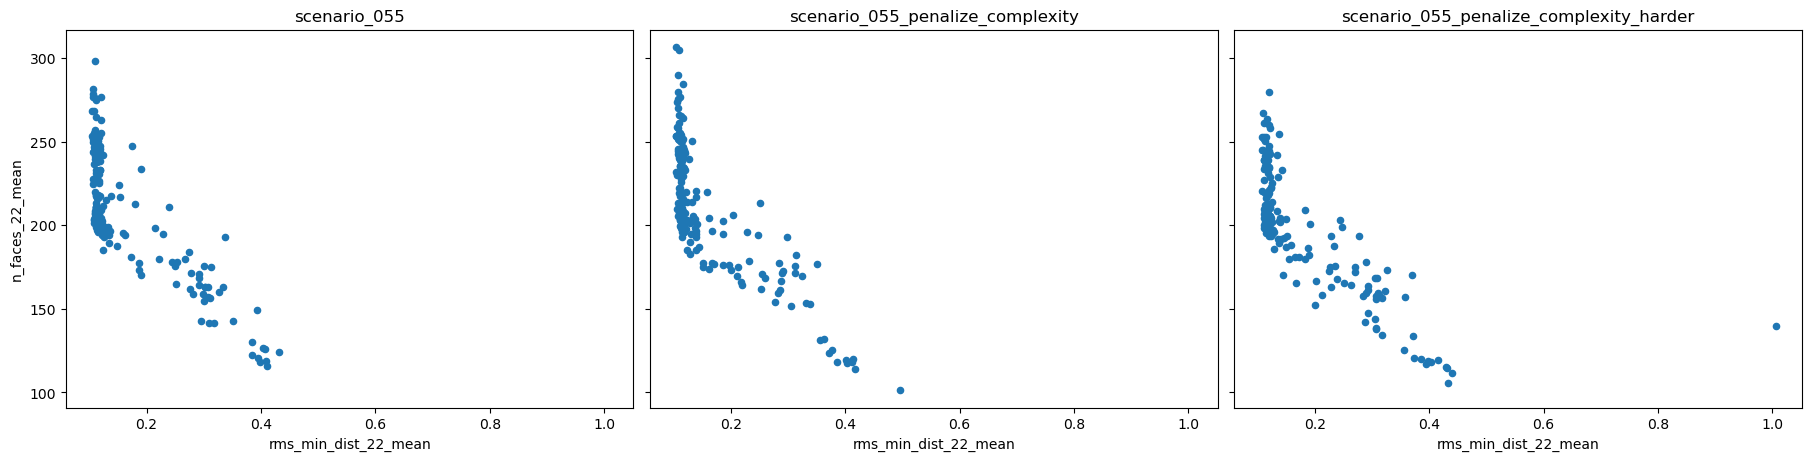

In [34]:
plot_metric_vs_metric_2(eos, "rms_min_dist_22_mean", "n_faces_22_mean", sharex="row")

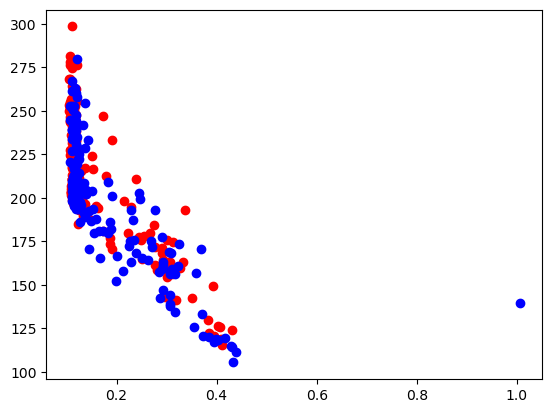

In [42]:
plt.scatter(ss[0]["rms_min_dist_22_mean"], ss[0]["n_faces_22_mean"], c = "red")
plt.scatter(ss[2]["rms_min_dist_22_mean"], ss[2]["n_faces_22_mean"], c = "blue")
plt.show()

In [85]:
# Create a column that indicates the scenarios that are not worse by more than a certain amount than the best target metric value
for i in range(len(ss)):
    ss[i]["best_pct"] = (ss[i]["rms_min_dist_22_mean"] <= 1.10 * ss[i]["rms_min_dist_22_mean"].min()).astype(int)

In [ ]:
for i in range(len(ss)):
    ss[i]["best_pct_or_best"] = ss[i]["best_pct"]
    ss[i].loc[ss[i]["is_best"] == 1, "best_pct_or_best"] = 2

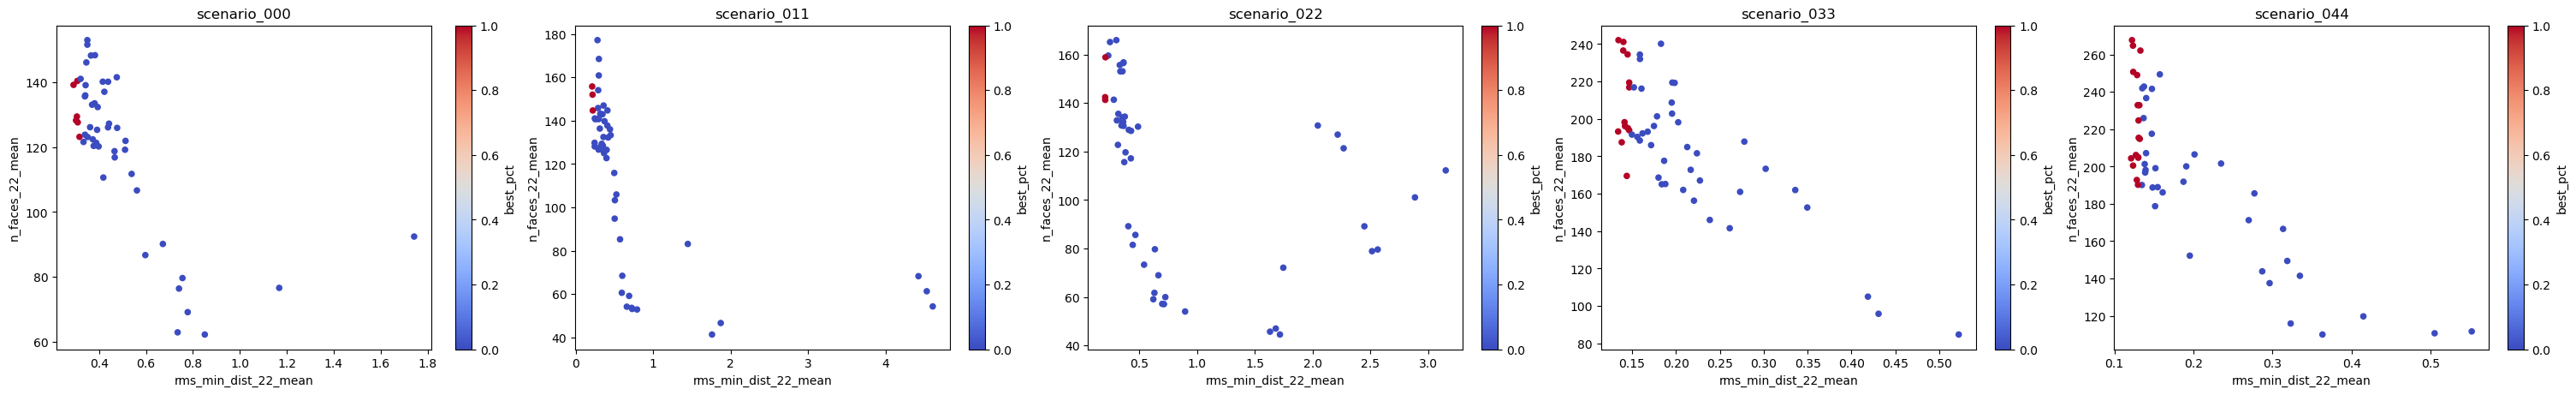

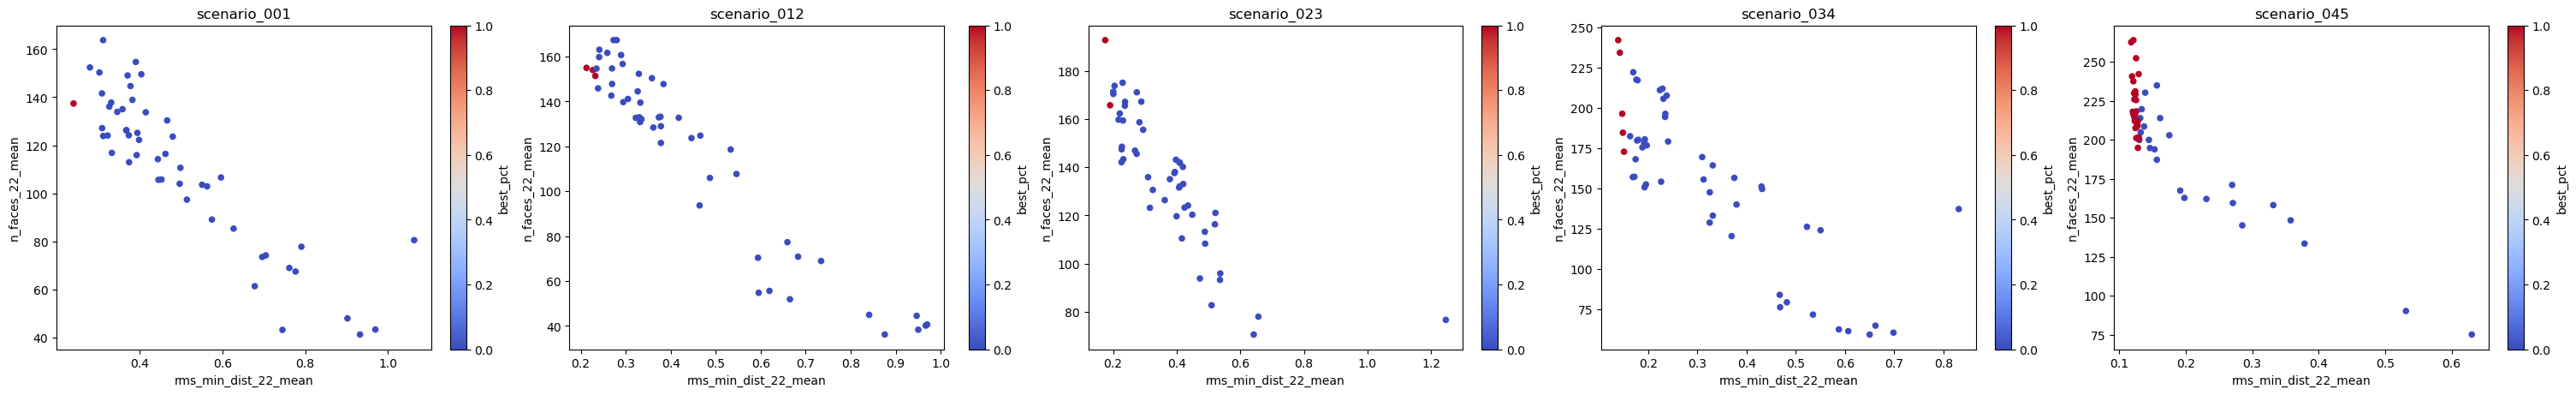

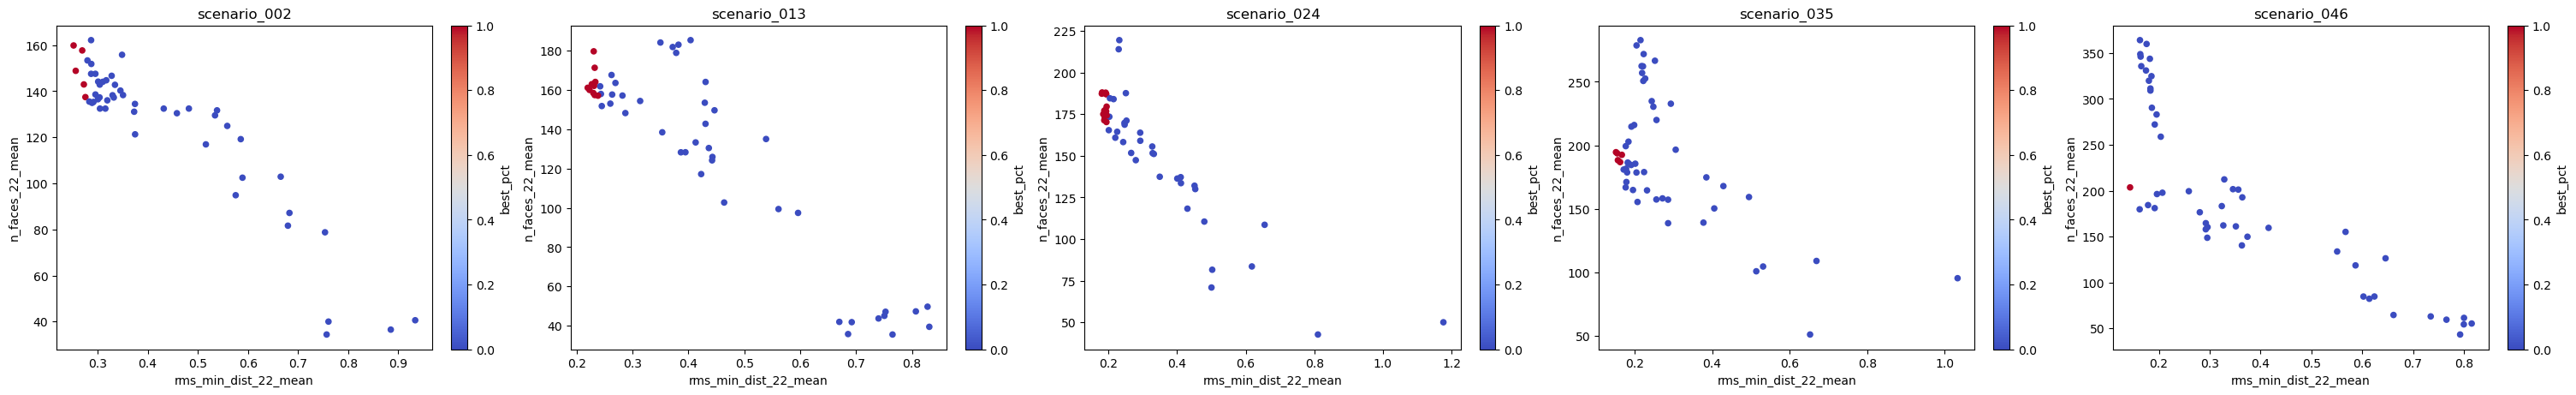

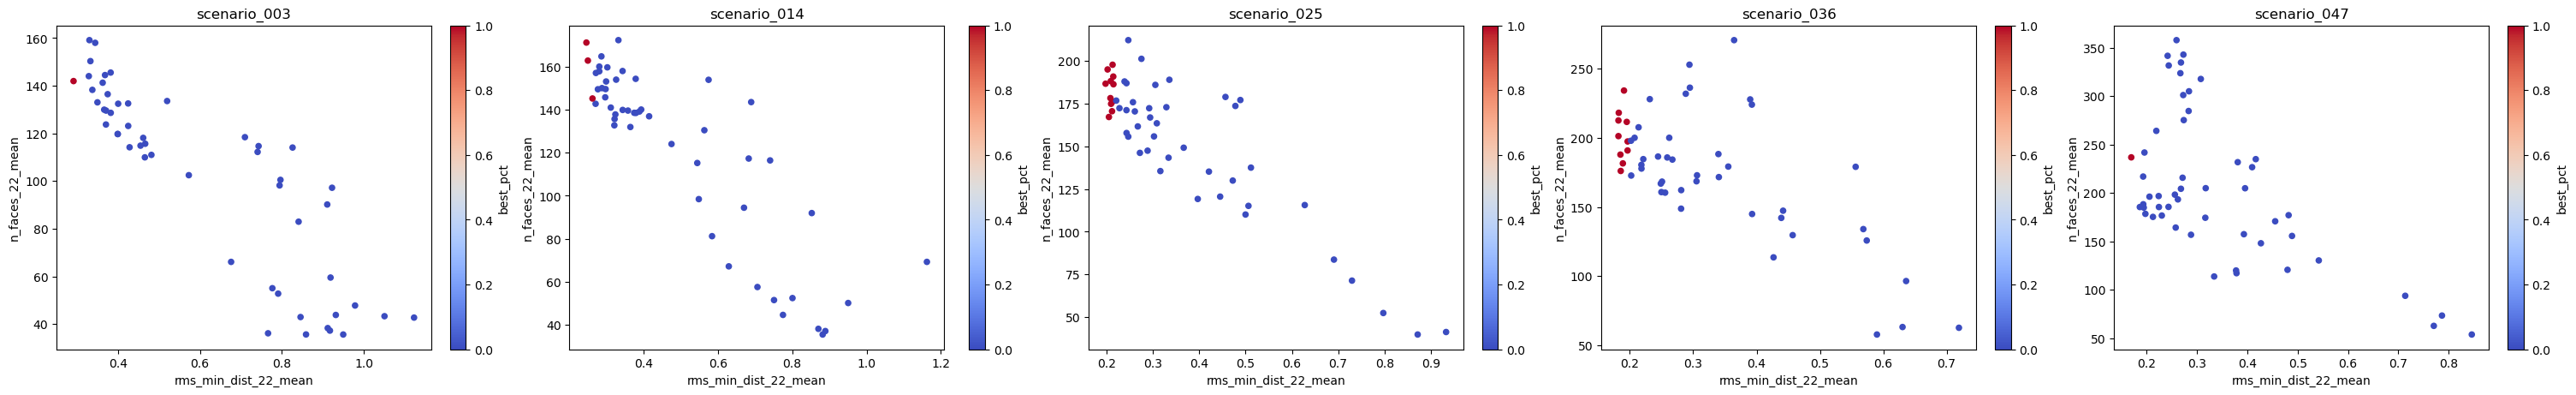

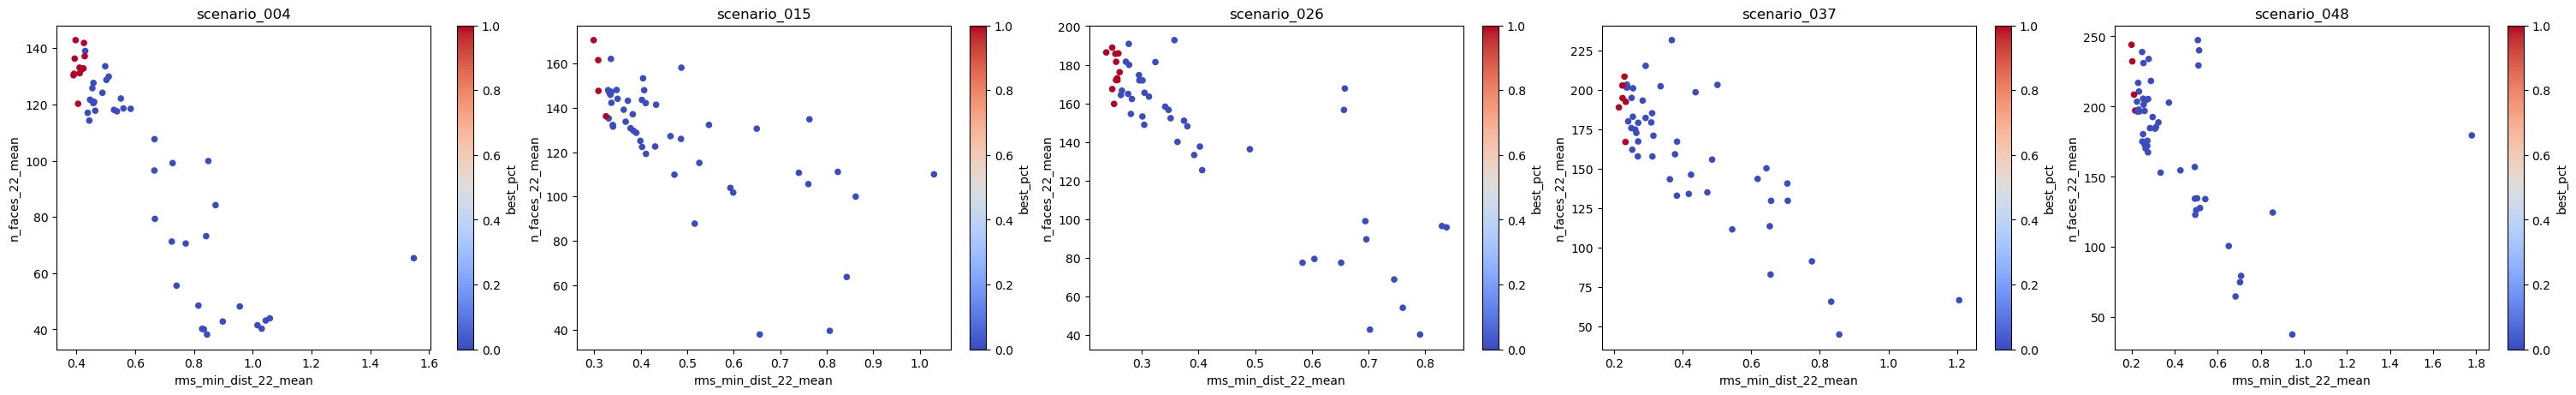

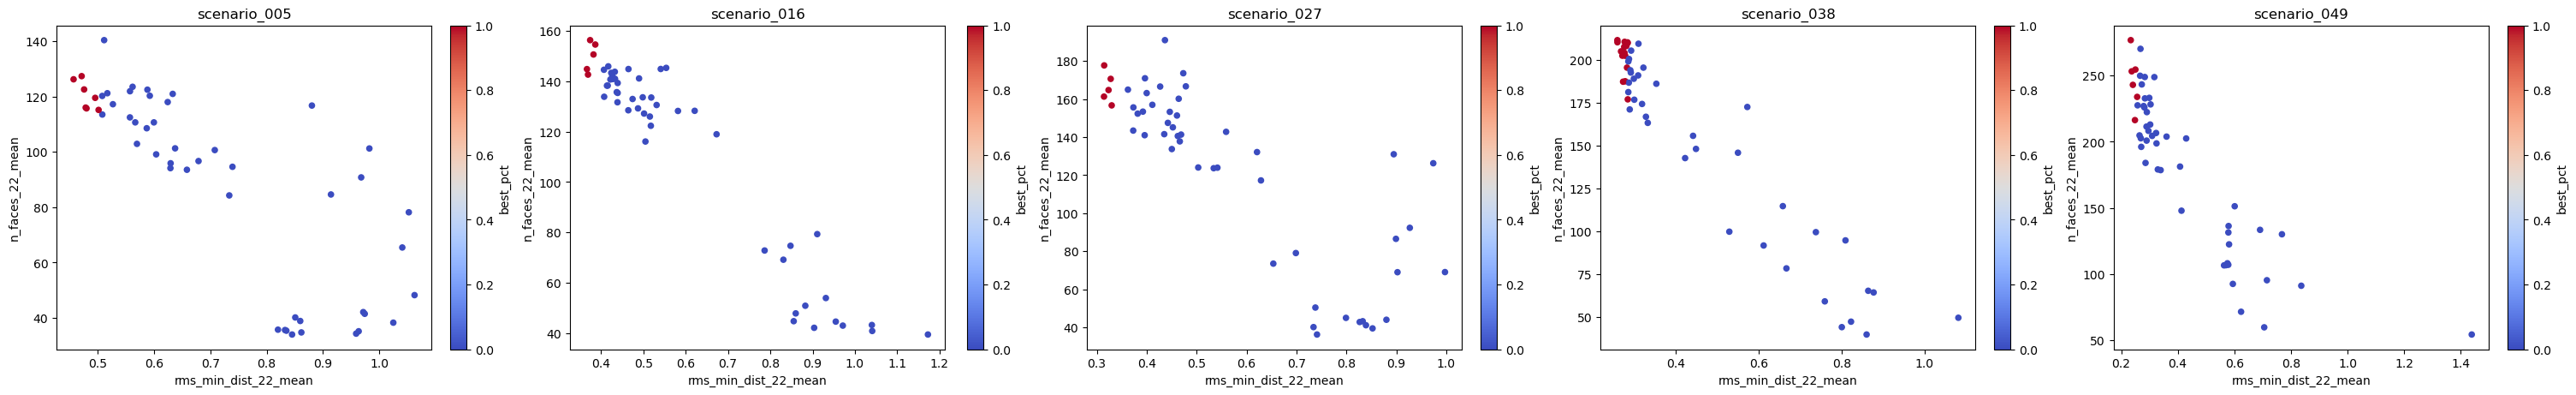

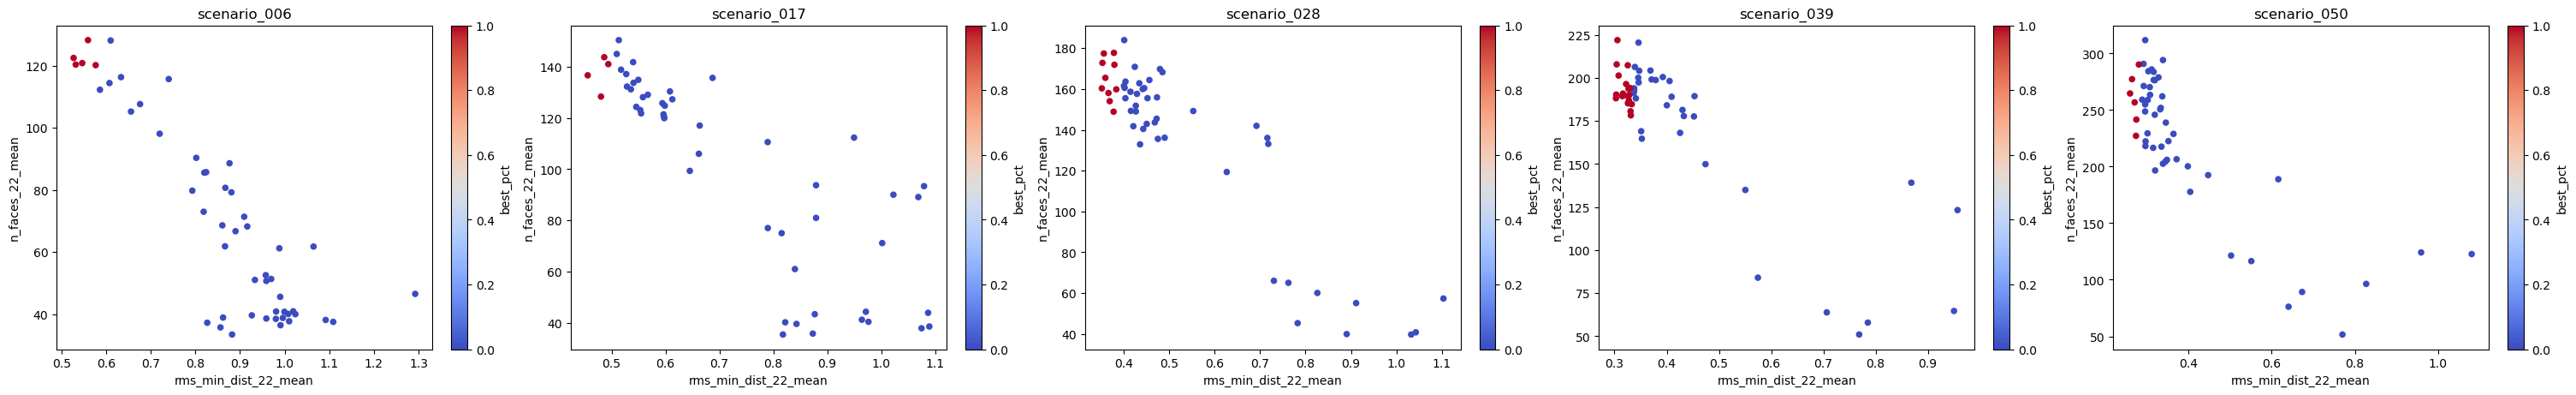

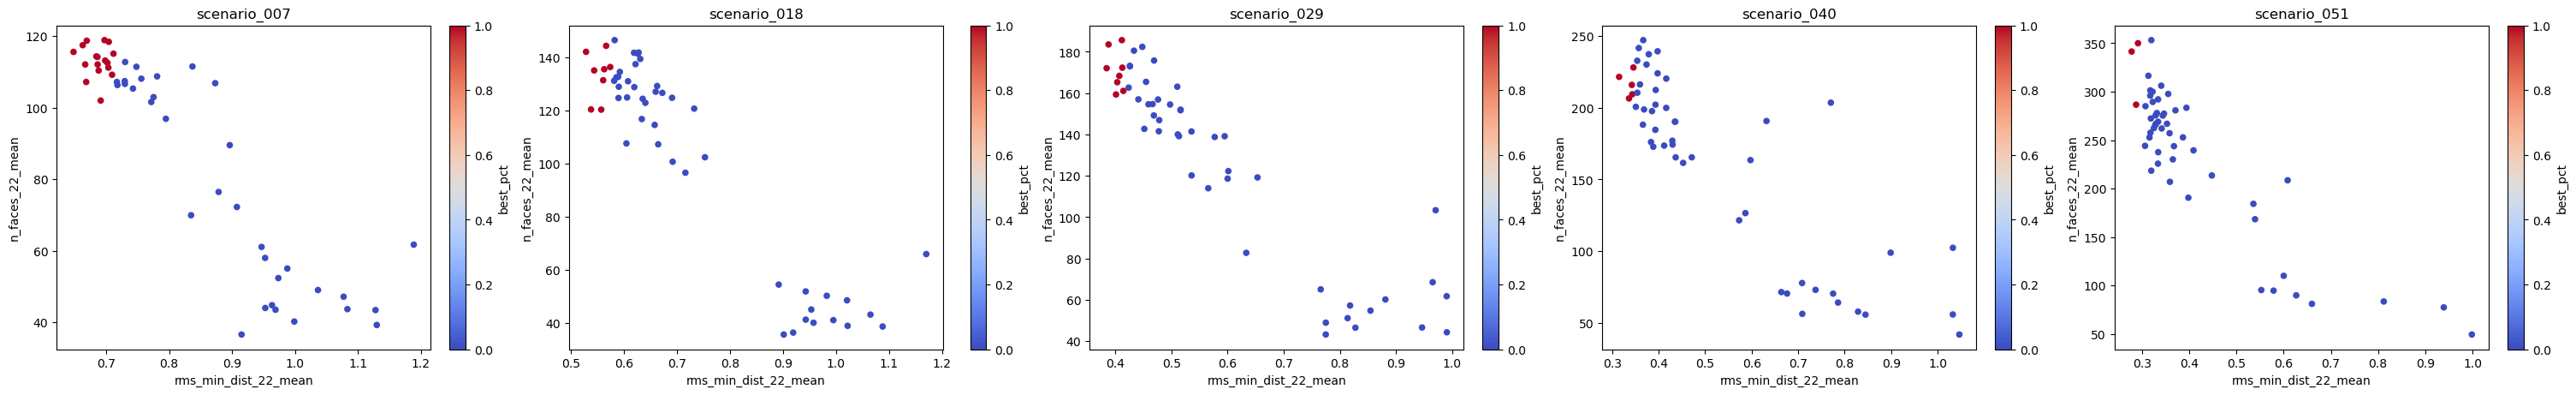

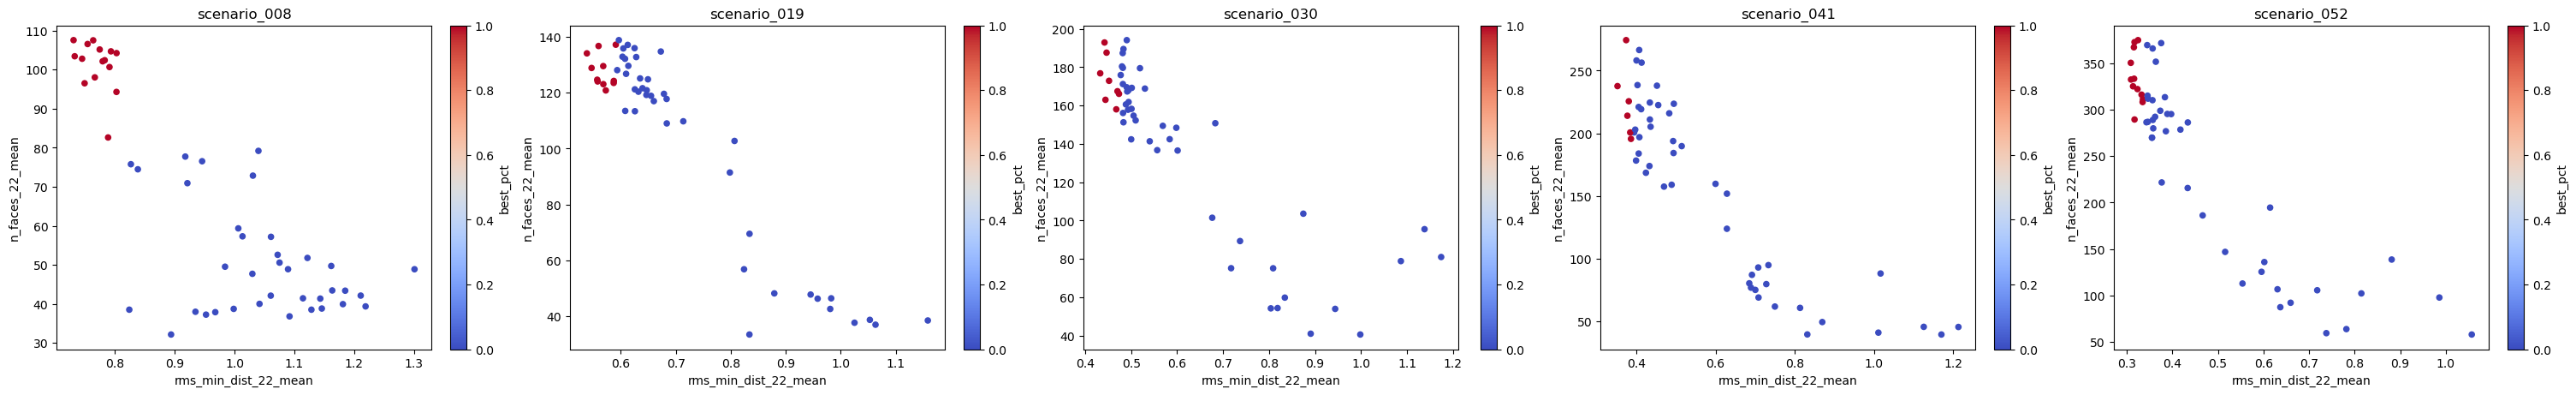

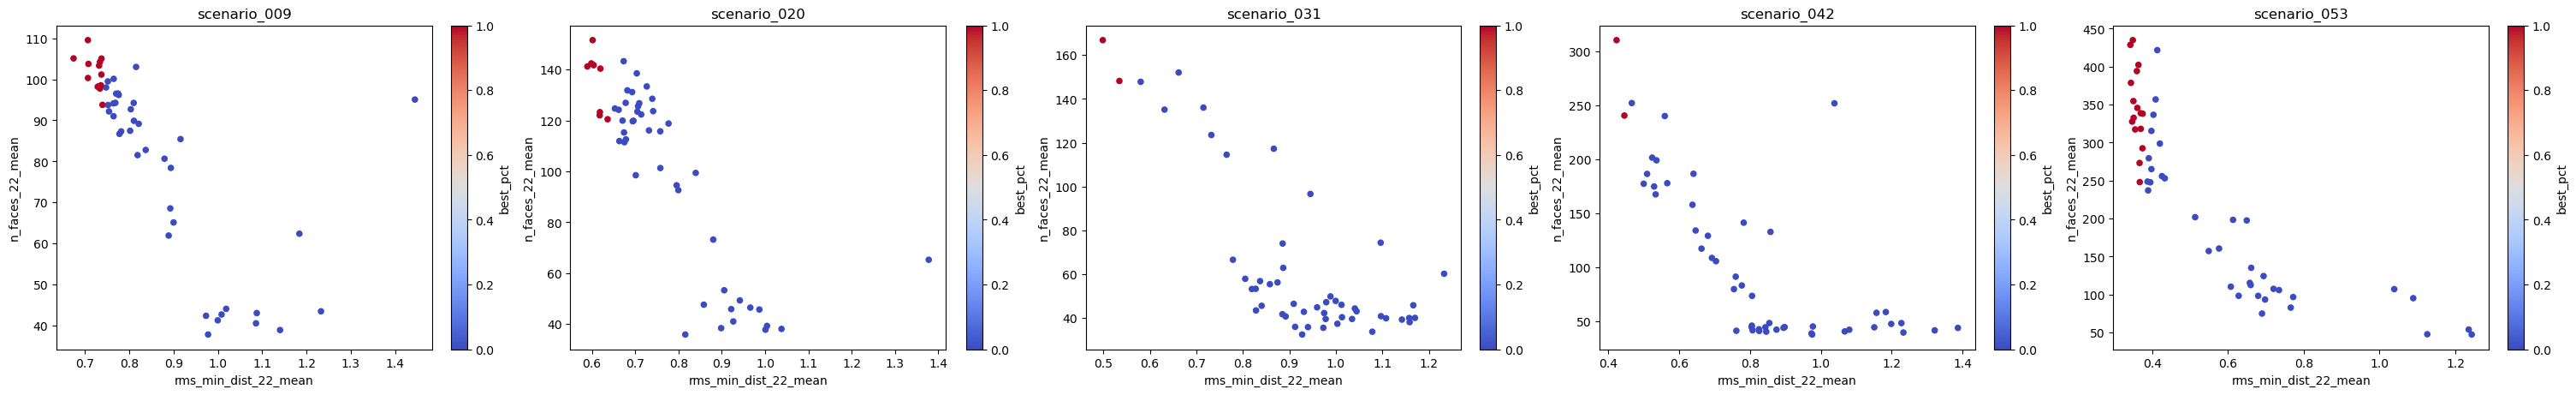

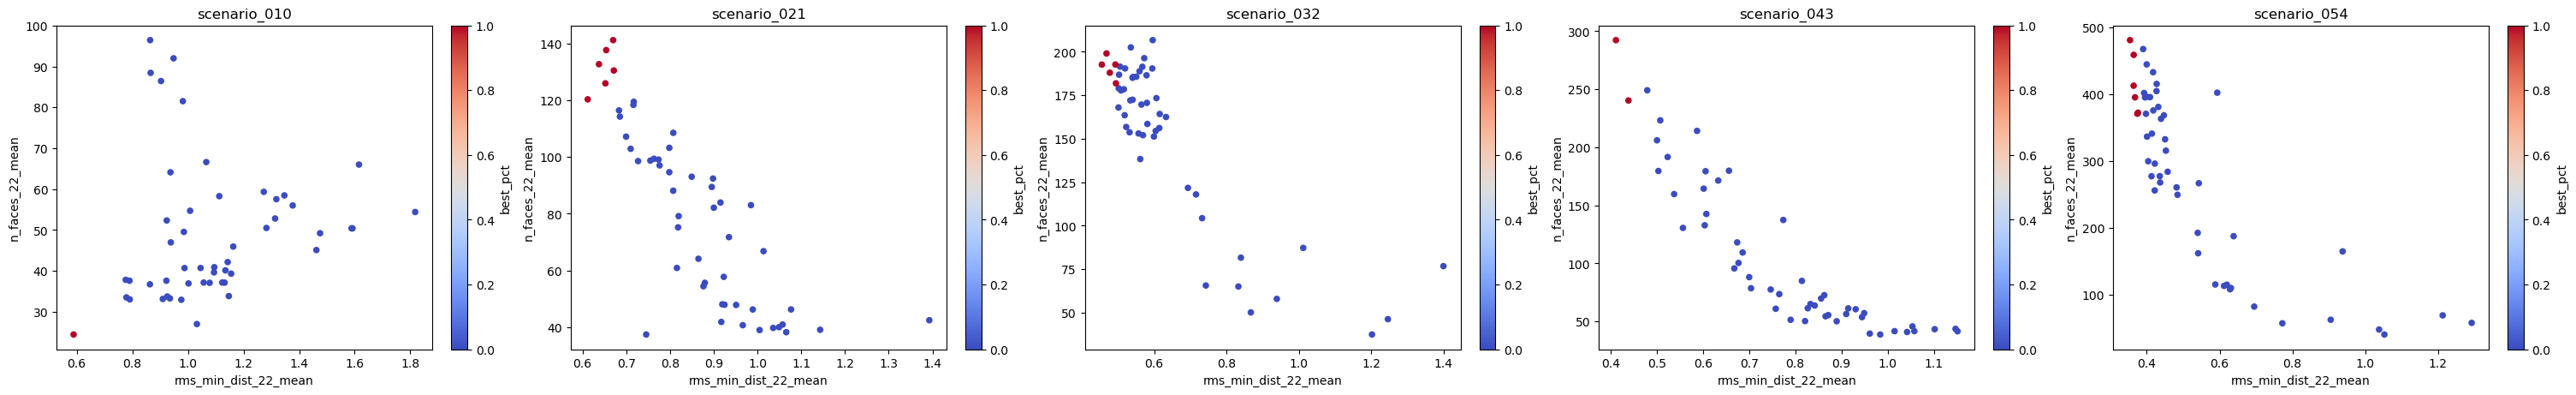

In [86]:
rows_error_levels = range(0, 11)
cols_density_levels = range(0, 5)
for i in rows_error_levels:
    plot_metric_vs_metric_2([eos[j*11 + i] for j in cols_density_levels], ["rms_min_dist_22_mean"], ["n_faces_22_mean"], c="best_pct", colormap="coolwarm", sharex=None, sharey=None)  # more colors: brg

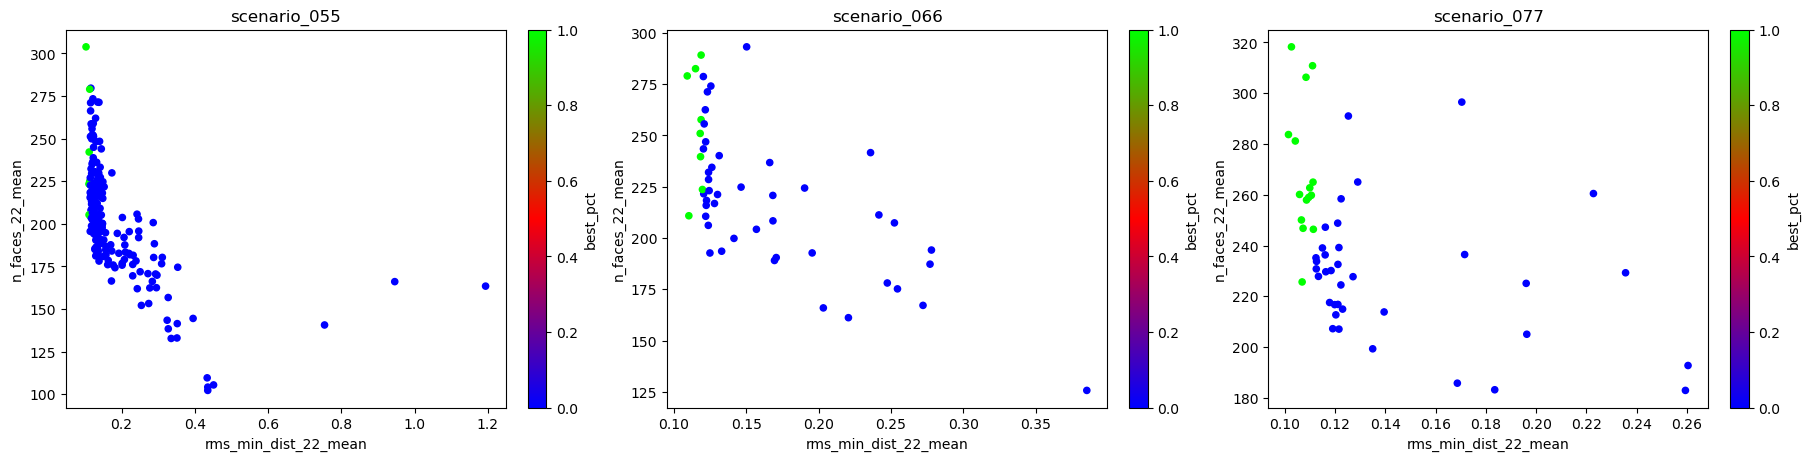

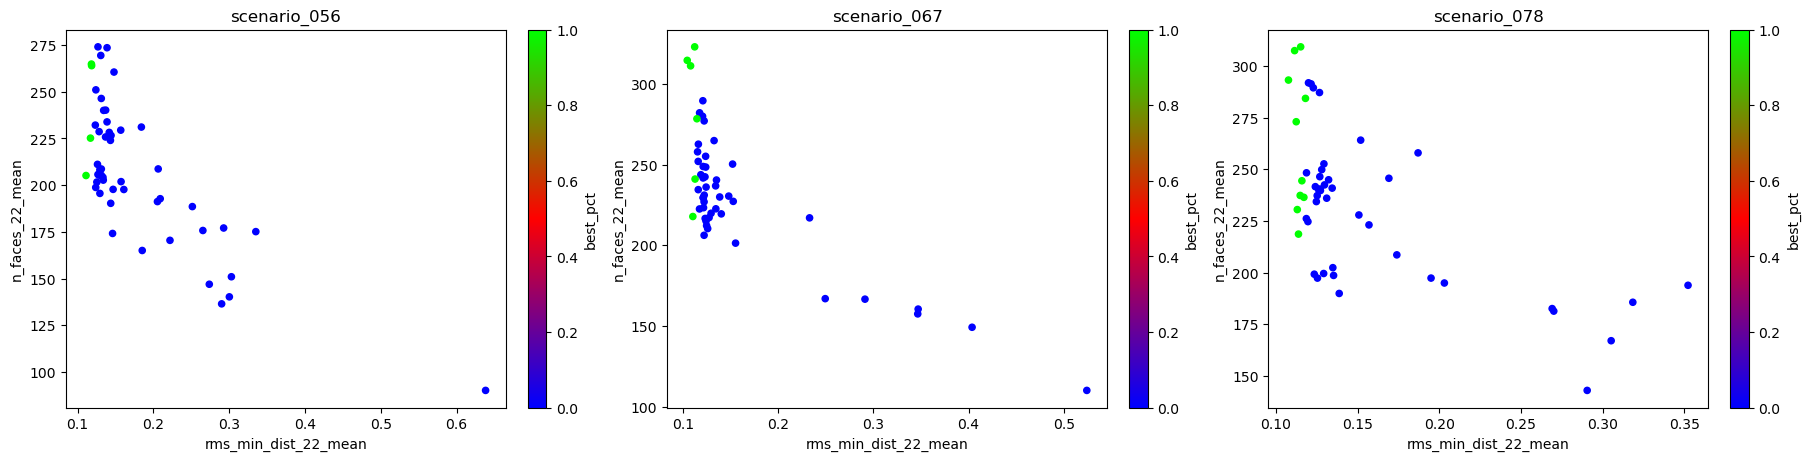

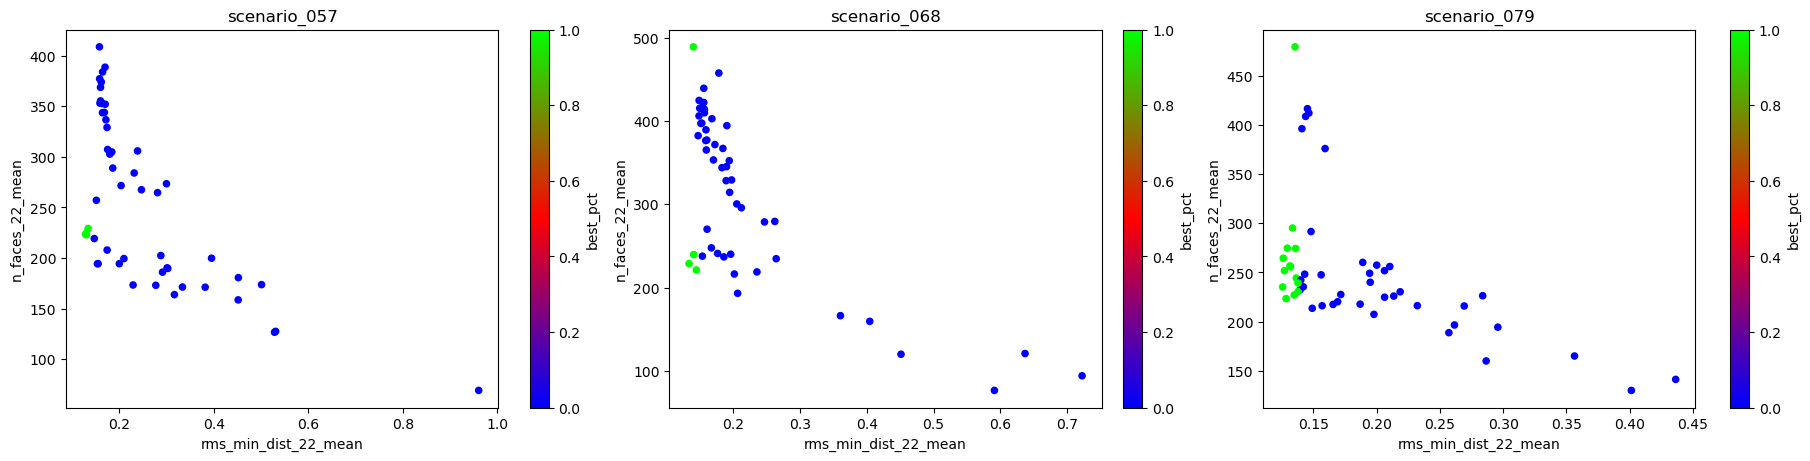

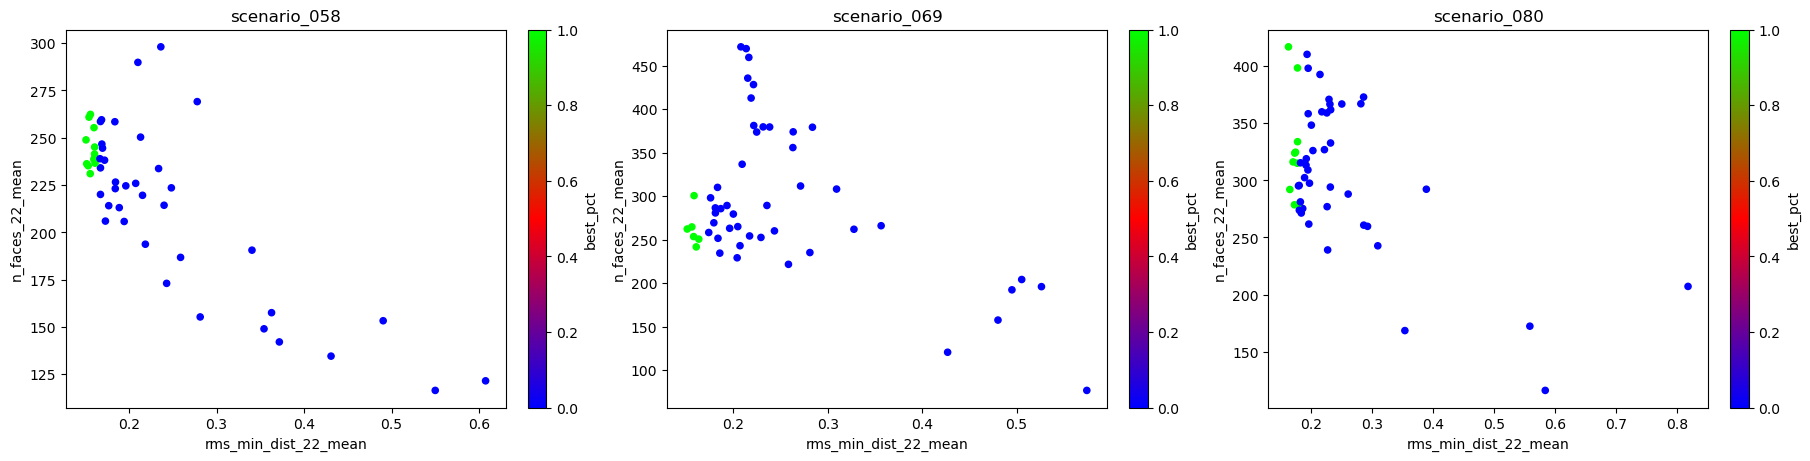

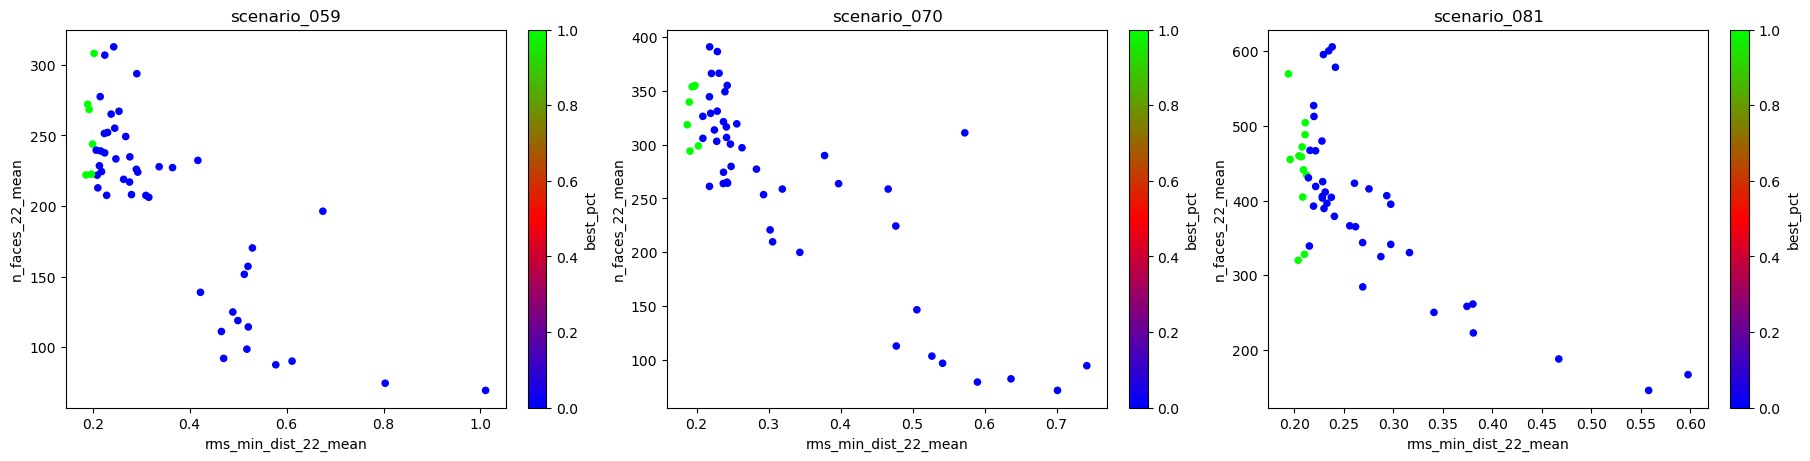

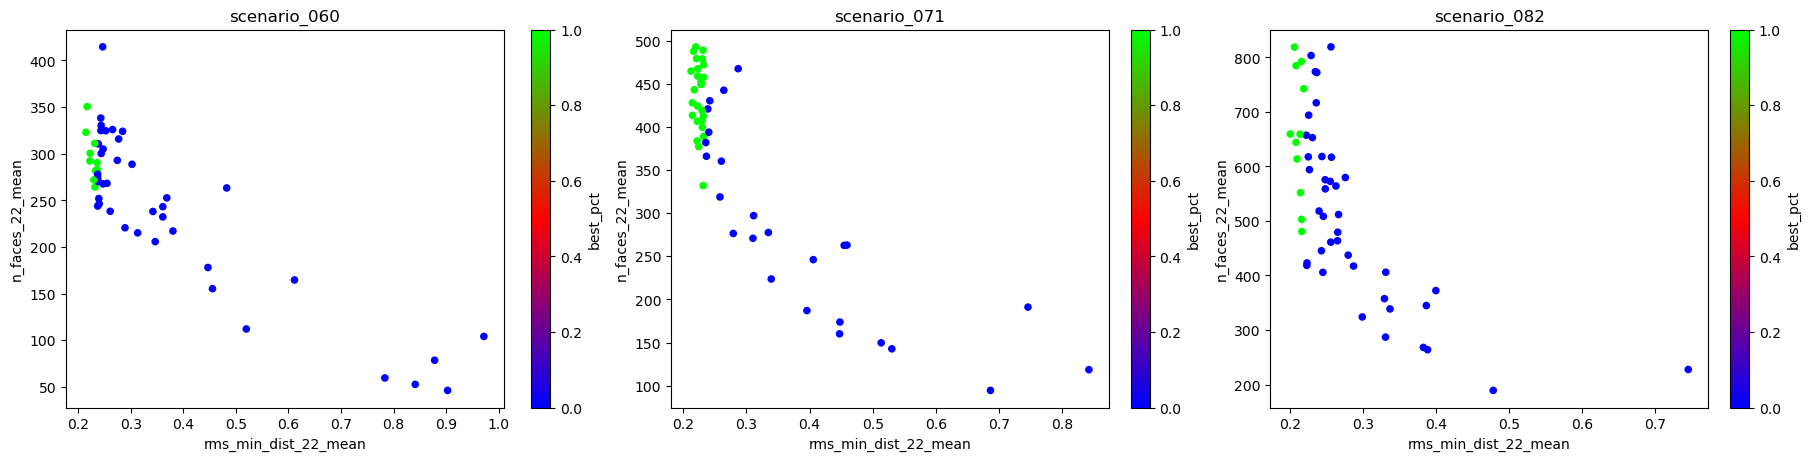

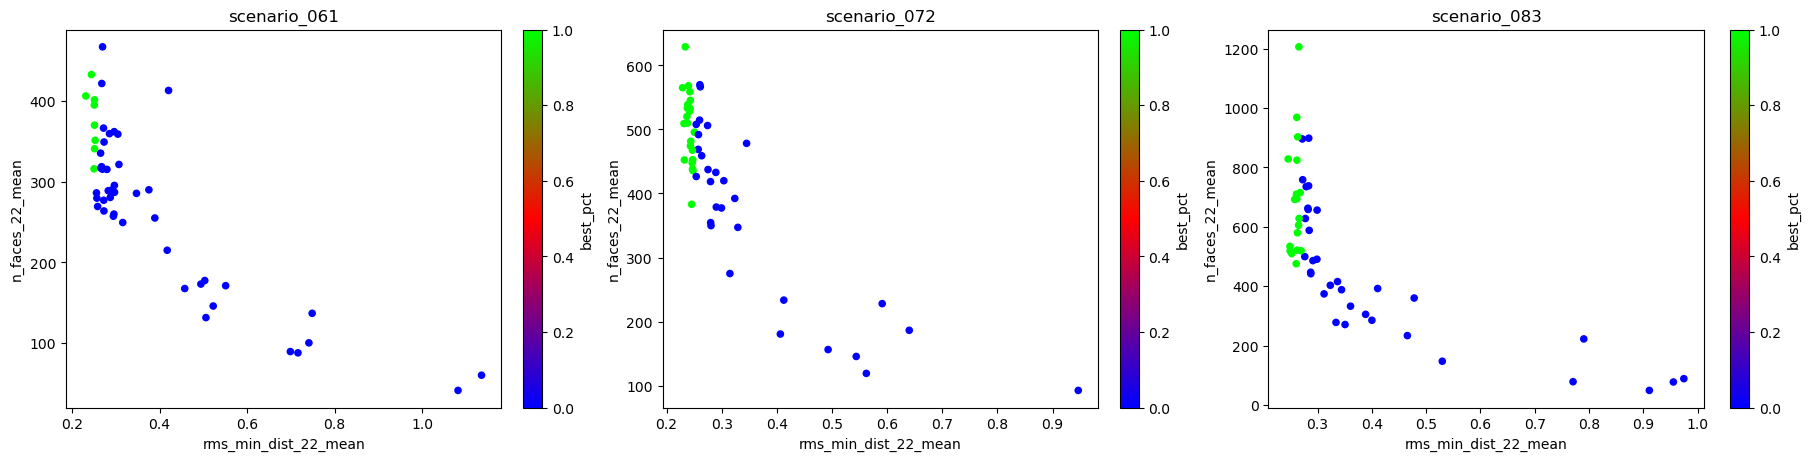

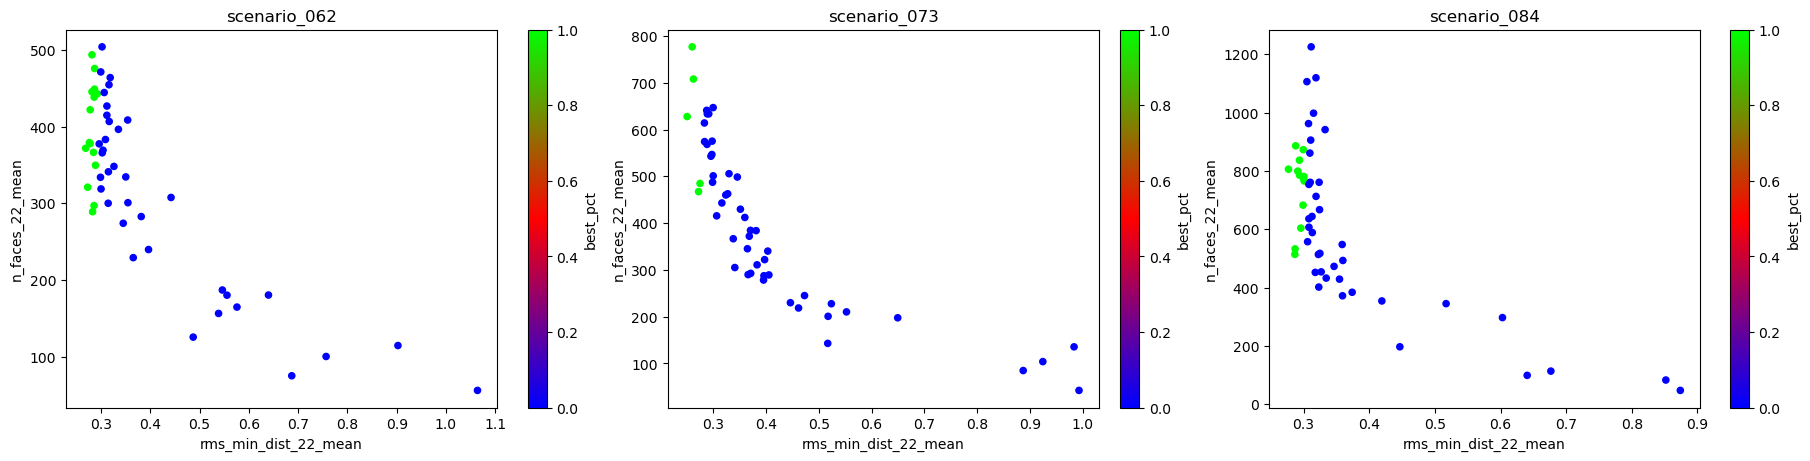

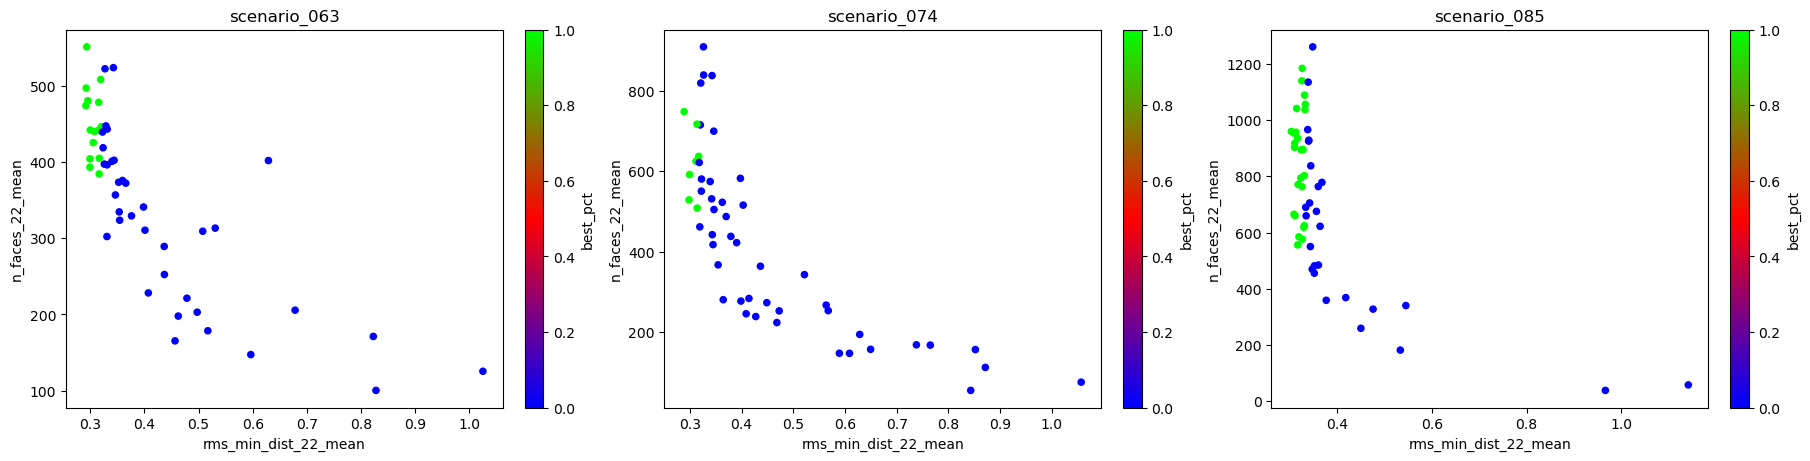

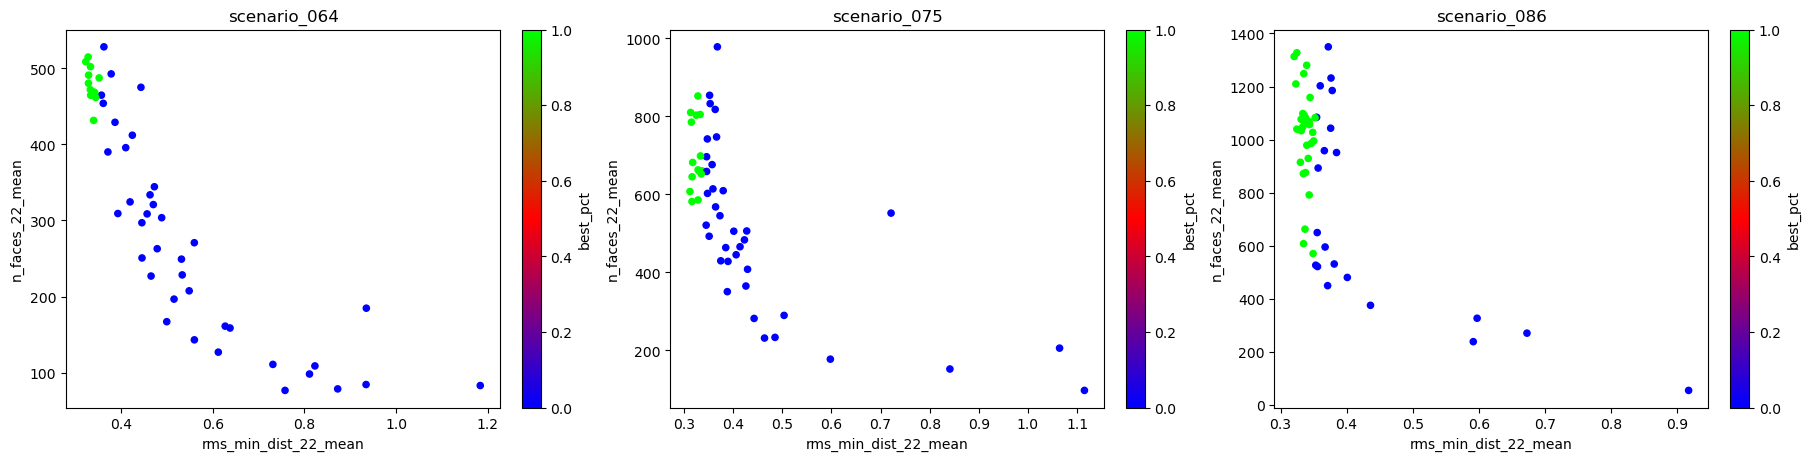

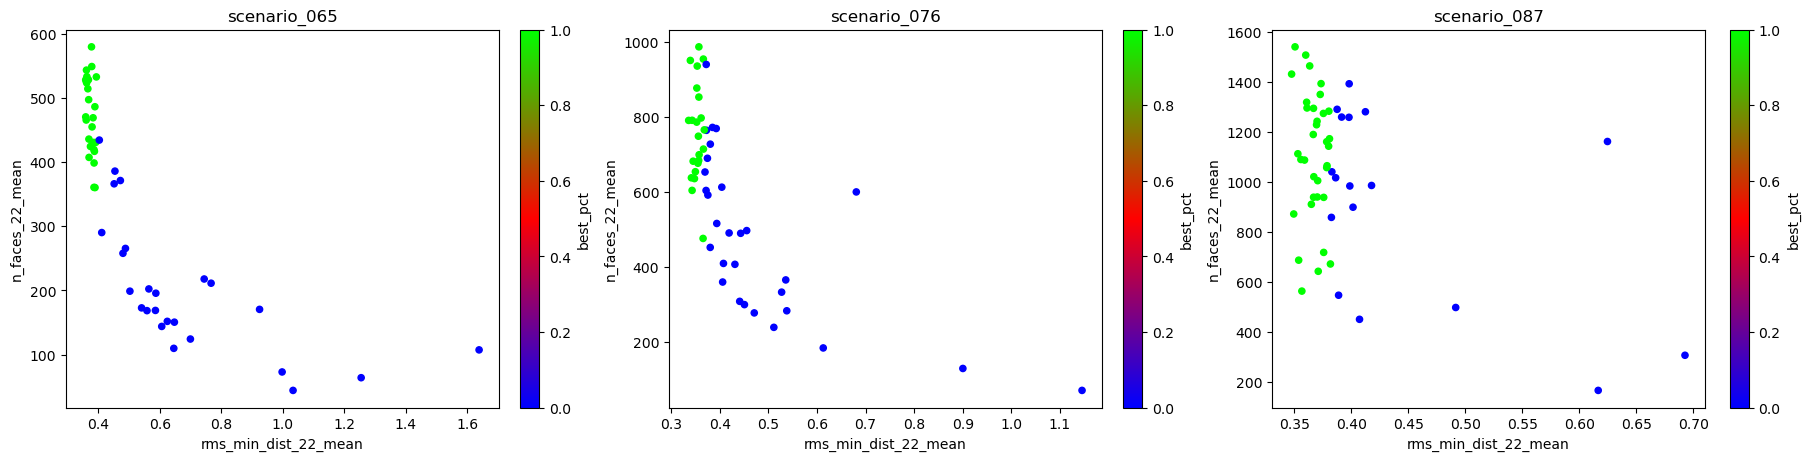

In [64]:
rows_error_levels = range(0, 11)
cols_density_levels = range(5, 8)
for i in rows_error_levels:
    plot_metric_vs_metric_2([eos[j*11 + i] for j in cols_density_levels], ["rms_min_dist_22_mean"], ["n_faces_22_mean"], c="best_pct", colormap="brg", sharex=None, sharey=None)

In [ ]:
plot_metric_vs_metric_2(eos, opt_params, "rms_min_dist_22_mean", c="n_faces_22_mean", colormap="coolwarm")

In [ ]:
plot_metric_vs_metric_2(eo, opt_params, ["rms_min_dist_22_mean", "n_faces_22_mean"])

In [ ]:
plot_metric_vs_metric_2(eo, ["n_faces_22_mean", "rms_min_dist_22_mean"], ["rms_min_dist_22_mean", "n_faces_22_mean"])

# Check reconstruction optimization for one scenario

## Load experiment, get summary stats

In [87]:
# eo = Experiment.load(e[55].recon_optim_output_dirpath, load_scenarios=True)
eo = Experiment.load(r"C:\Users\Florian\Data\city-to-scan-to-city\utrecht_10-492-594_v2\06_reconstruction_optimization\scenario_010")


Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...
- 51 scenarios loaded.


In [88]:
eo.run_steps(Scenario.setup_evaluation, lods=["2.2"])


Running 'setup_evaluation' for optim_0000 ...

Finished 'setup_evaluation' for optim_0000 after 0:00:00.021070.

Running 'setup_evaluation' for optim_0001 ...

Finished 'setup_evaluation' for optim_0001 after 0:00:00.016056.

Running 'setup_evaluation' for optim_0002 ...

Finished 'setup_evaluation' for optim_0002 after 0:00:00.014511.

Running 'setup_evaluation' for optim_0003 ...

Finished 'setup_evaluation' for optim_0003 after 0:00:00.014550.

Running 'setup_evaluation' for optim_0004 ...

Finished 'setup_evaluation' for optim_0004 after 0:00:00.016540.

Running 'setup_evaluation' for optim_0005 ...

Finished 'setup_evaluation' for optim_0005 after 0:00:00.015028.

Running 'setup_evaluation' for optim_0006 ...

Finished 'setup_evaluation' for optim_0006 after 0:00:00.016027.

Running 'setup_evaluation' for optim_0007 ...

Finished 'setup_evaluation' for optim_0007 after 0:00:00.020964.

Running 'setup_evaluation' for optim_0008 ...

Finished 'setup_evaluation' for optim_0008 after

In [89]:
# run additional evaluators if it was not done yet
eo.run_steps(Scenario.run_evaluation, evaluator_selection=["complexity", "complexity_diff", "geoflow_output"])


Running 'run_evaluation' for optim_0000 ...

Starting ComplexityEvaluator ...

Counting faces for LOD 2.2 ...

Finished ComplexityEvaluator after 0:00:00.019758.

Starting ComplexityDifferenceEvaluator ...

Starting ComplexityEvaluator ...

Counting faces for LOD 2.2 ...

Finished ComplexityEvaluator after 0:00:04.982596.

Evaluation results for complexity evaluator 2 already exist. Will not reevaluate.

Finished ComplexityDifferenceEvaluator after 0:00:05.005152.

Starting GeoflowOutputEvaluator ...

Starting GeopackageBuildingsEvaluator ...

Finished GeopackageBuildingsEvaluator after 0:00:00.113551.

Starting CityJSONBuildingsEvaluator ...

Finished CityJSONBuildingsEvaluator after 0:00:00.036122.

Starting WavefrontOBJBuildingsEvaluator ...

Finished WavefrontOBJBuildingsEvaluator after 0:00:00.014524.

Finished GeoflowOutputEvaluator after 0:00:00.169730.

Finished 'run_evaluation' for optim_0000 after 0:00:05.210162.

Running 'run_evaluation' for optim_0001 ...

Starting Complex

In [90]:
eo.compute_summary_statistics(evaluator_selection=["hausdorff", "complexity", "complexity_diff", "geoflow_output"], ignore_missing=True) #, "iou_3d", "geoflow_output"])


Computing summary statistics of 51 scenarios ...


In [91]:
s = eo.summary_stats
s

,target_density,error_level,pulse_freq_hz,scan_freq_hz,point_spacing_along,point_spacing_across,std_horizontal_error,std_vertical_error,r_plane_epsilon,r_plane_k,...,n_faces_22_norm_abs_diff_max,gpkg_total_22,gpkg_unique_22,gpkg_multiple_22,cj_buildings,cj_building_parts,cj_buildings_with_bp,cj_buildings_zero_bp,cj_buildings_one_bp,cj_buildings_multiple_bp
name,,,,,,,,,,,,,,,,,,,,,
optim_0000,2.0,1.0,94407,85,0.705882,0.327703,0.707107,0.3,0.200000,15,...,0.888889,45,45,0,100,45,45,55,45,0
optim_0001,2.0,1.0,94407,85,0.705882,0.327703,0.707107,0.3,0.942230,11,...,2.500000,93,93,0,100,93,93,7,93,0
optim_0002,2.0,1.0,94407,85,0.705882,0.327703,0.707107,0.3,0.677371,21,...,0.916667,81,81,0,100,81,81,19,81,0
optim_0003,2.0,1.0,94407,85,0.705882,0.327703,0.707107,0.3,1.622208,19,...,1.666667,90,90,0,100,90,90,10,90,0
optim_0004,2.0,1.0,94407,85,0.705882,0.327703,0.707107,0.3,0.131649,23,...,0.916667,13,13,0,100,13,13,87,13,0
optim_0005,2.0,1.0,94407,85,0.705882,0.327703,0.707107,0.3,1.900667,23,...,4.000000,85,85,0,100,85,85,15,85,0
optim_0006,2.0,1.0,94407,85,0.705882,0.327703,0.707107,0.3,1.803589,23,...,3.000000,86,86,0,100,86,86,14,86,0
optim_0007,2.0,1.0,94407,85,0.705882,0.327703,0.707107,0.3,1.406441,22,...,3.000000,87,87,0,100,87,87,13,87,0
optim_0008,2.0,1.0,94407,85,0.705882,0.327703,0.707107,0.3,1.455753,19,...,2.750000,89,89,0,100,89,89,11,89,0


### Compute rankings

In [11]:
def compute_metric_ranks(s: pd.DataFrame):
    # -------------------------------------------------------------------------------------
    # Compute ranks for quality metric columns
    rank_columns = ["rms_min_dist_22_mean", "hausdorff_22_rms", "n_faces_22_mean", "iou_22_mean"]
    ascending = [True, True, True, False]
    for c, a in zip(rank_columns, ascending):
        s["rank_" + c] = s[c].rank(ascending=a)
        
    # Sum up the ranks (except Hausdorff) to be able to pick the best performing on average
    rank_sum_columns = ["rank_rms_min_dist_22_mean", "rank_n_faces_22_mean", "rank_iou_22_mean"]
    s["rank_sum"] = s[rank_sum_columns].sum(axis=1)  # sum up the rank values across the columns
    
    # Sum up the ranks, weighting the number of faces twice as much as the other two
    rank_sum_column_weights = [0.75, 1.5, 0.75]  # equals [1, 2, 1] in effect, but makes absolute values comparable to unweighted rank (sum of 3)
    s["rank_sum_weighted"] = pd.DataFrame.from_dict({c: w * s[c] for c, w in zip(rank_sum_columns, rank_sum_column_weights)}).sum(axis=1)
    
    # -------------------------------------------------------------------------------------
    # Compute ranks based on value ranges of the quality metrics
    for c, a in zip(rank_columns, ascending):
        if a:
            s["rangerank_" + c] = (s[c] - s[c].min()) / (s[c].max() - s[c].min())
        else:
            s["rangerank_" + c] = (s[c].max() - s[c]) / (s[c].max() - s[c].min())
    
    rangerank_sum_columns = ["rangerank_rms_min_dist_22_mean", "rangerank_n_faces_22_mean", "rangerank_iou_22_mean"]
    s["rangerank_sum"] = s[rangerank_sum_columns].sum(axis=1)  # sum up the rank values across the columns
    
    # Sum up the ranks, weighting the number of faces twice as much as the other two
    rangerank_sum_column_weights = [0.75, 1.5, 0.75]  # equals [1, 2, 1] in effect, but makes absolute values comparable to unweighted rank (sum of 3)
    s["rangerank_sum_weighted"] = pd.DataFrame.from_dict({c: w * s[c] for c, w in zip(rangerank_sum_columns, rangerank_sum_column_weights)}).sum(axis=1)
    
    return s

In [12]:
s = compute_metric_ranks(s)

KeyError: 'iou_22_mean'

### Check best results in table

In [ ]:
# The best performing parameter set was stored in the parent scenario's reconstruction config.
# (They may have been overwritten if the parent scenario or experiment was setup and saved newly.)
e[55].config["reconstruction_config"]["geoflow_parameters"], e[58].config["reconstruction_config"]["geoflow_parameters"]

In [13]:
def get_best_results(s: pd.DataFrame):
    columns = []
    columns.extend(["iou_22_mean", "rank_iou_22_mean"])
    columns.extend(["hausdorff_22_rms", "rank_hausdorff_22_rms"])
    columns.extend(["rms_min_dist_22_mean", "rank_rms_min_dist_22_mean"])
    columns.extend(["n_faces_22_mean", "rank_n_faces_22_mean"])
    columns.extend(["n_faces_22_std"])
    columns.extend(["gpkg_unique_22"])
    # columns.extend(["area_22_mean_abs_diff"])
    columns.extend(list(glb.geoflow_parameters_default.keys()))
    
    # return s[(s["hausdorff_22_rms"] == min(s["hausdorff_22_rms"])) | (s["rms_min_dist_22_mean"] == min(s["rms_min_dist_22_mean"]))][columns]
    return s[(s["iou_22_mean"] == max(s["iou_22_mean"])) | (s["hausdorff_22_rms"] == min(s["hausdorff_22_rms"])) | (s["rms_min_dist_22_mean"] == min(s["rms_min_dist_22_mean"]))][columns]

display(get_best_results(eo.summary_stats))

KeyError: 'iou_22_mean'

Get all optim scenarios for which the target metric (rms min dist) is below a certain quantile.

In [ ]:
s[s.rms_min_dist_22_mean < s.rms_min_dist_22_mean.quantile(q=0.5)].loc[:, ["rms_min_dist_22_mean", "n_faces_22_mean", "iou_22_mean"]]

Get all optim scenarios for which the target metric (rms min dist) does not exceed the optimum target metric value by more than `threshold_ratio` times the range of target metric values (i.e., target metric maximum minus minimum).

In [ ]:
threshold_ratio = 0.03
s[
    s.rms_min_dist_22_mean < (
            s.rms_min_dist_22_mean.min() + threshold_ratio*(s.rms_min_dist_22_mean.max() - s.rms_min_dist_22_mean.min())
    )
].loc[:,
    [
        "rms_min_dist_22_mean",
        "n_faces_22_mean",
        "iou_22_mean",
        "rank_rms_min_dist_22_mean",
        "rank_n_faces_22_mean",
        "rank_iou_22_mean",
        "rank_sum",
        "rank_sum_weighted",
        "rangerank_rms_min_dist_22_mean",
        "rangerank_n_faces_22_mean",
        "rangerank_iou_22_mean",
        "rangerank_sum",
        "rangerank_sum_weighted",
    ]]

In [ ]:
s[s.rms_min_dist_22_mean < (s.rms_min_dist_22_mean.min() + threshold_ratio*(s.rms_min_dist_22_mean.max() - s.rms_min_dist_22_mean.min()))].loc[:, ["rms_min_dist_22_mean", "n_faces_22_mean"]].plot.scatter("n_faces_22_mean", "rms_min_dist_22_mean")

In [ ]:
s[s.n_faces_22_mean < s.n_faces_22_mean.quantile(q=0.05)]

In [ ]:
eo.summary_stats.n_faces_22_mean.hist()

In [ ]:
# plt.scatter(range(100), s["iou_22_mean"])
plt.scatter(range(s.shape[0]), s["hausdorff_22_rms"])
plt.scatter(range(s.shape[0]), s["rms_min_dist_22_mean"])
# plt.legend(["iou_22_mean", "hausdorff_22_rms", "rms_min_dist_22_mean"])
plt.legend(["hausdorff_22_rms", "rms_min_dist_22_mean"])
# plt.ylim(.2, 0.95)
plt.show()

### Plotting functions

In [14]:
opt_params = [m.split("_", 1)[1] for m in glb.geoflow_optim_parameter_space_narrow.keys()]

def plot_metric_vs_parameter(es: list[Experiment] | Experiment, target_metric: str):
    if isinstance(es, Experiment):
        es = [es]
    stats = [e.summary_stats for e in es]
    nrows, ncols = len(opt_params), len(stats)
    fig, axs = plt.subplots(nrows, ncols, figsize=(6*ncols, 4.5*nrows), sharey="all", layout="constrained")
    
    for i, opt_param in enumerate(opt_params):
        for j, s in enumerate(stats):
            if ncols == 1:
                ax = axs[i]
            else:
                ax = axs[i, j]
            s.plot.scatter(opt_param, target_metric, ax=ax)
            if i == 0:
                ax.set_title(es[j].name)
    
    plt.show()

In [15]:
def plot_metric_vs_metric(es: list[Experiment] | Experiment, x, ys):
    if isinstance(es, Experiment):
        es = [es]
    if isinstance(ys, str):
        ys = [ys]
    stats = [e.summary_stats for e in es]
    nrows, ncols = len(ys), len(stats)
    fig, axs = plt.subplots(nrows, ncols, figsize=(6*ncols, 4.5*nrows), sharey="row", sharex="row", layout="constrained")
    
    for i, y in enumerate(ys):
        for j, s in enumerate(stats):
            if ncols == 1:
                ax = axs[i]
            else:
                if nrows == 1:
                    ax = axs[j]
                else:
                    ax = axs[i, j]
            s.plot.scatter(x, y, ax=ax)
            if i == 0:
                ax.set_title(es[j].name)
    
    plt.show()

In [92]:
def plot_metric_vs_metric_2(es: list[Experiment] | Experiment, xs, ys, **kwargs):
    if isinstance(es, Experiment):
        es = [es]
    if isinstance(xs, str):
        xs = [xs]
    if isinstance(ys, str):
        ys = [ys]
    stats = [e.summary_stats for e in es]
    n_dependents = len(ys)
    n_independents = len(xs)
    nrows, ncols = n_independents * n_dependents, len(stats)
    fig, axs = plt.subplots(nrows, ncols, figsize=(6*ncols, 4.5*nrows), sharey="row", layout="constrained")
    
    for h, x in enumerate(xs):
        for i, y in enumerate(ys):
            for j, s in enumerate(stats):
                if ncols == 1:
                    ax = axs[(h * n_dependents) + i]
                else:
                    if nrows == 1:
                        ax = axs[j]
                    else:
                        ax = axs[(h * n_dependents) + i, j]
                s.plot.scatter(x, y, ax=ax, **kwargs)
                if (h + i) == 0:
                    ax.set_title(es[j].name)
                # if (i + 1) == len(ys):
                #     ax.tick_params(axis="both", reset=True)
        
    plt.show()

In [ ]:
plot_metric_vs_parameter(eo, "n_faces_22_mean")

In [ ]:
plot_metric_vs_metric_2(eo, opt_params, ["rms_min_dist_22_mean", "n_faces_22_mean"])

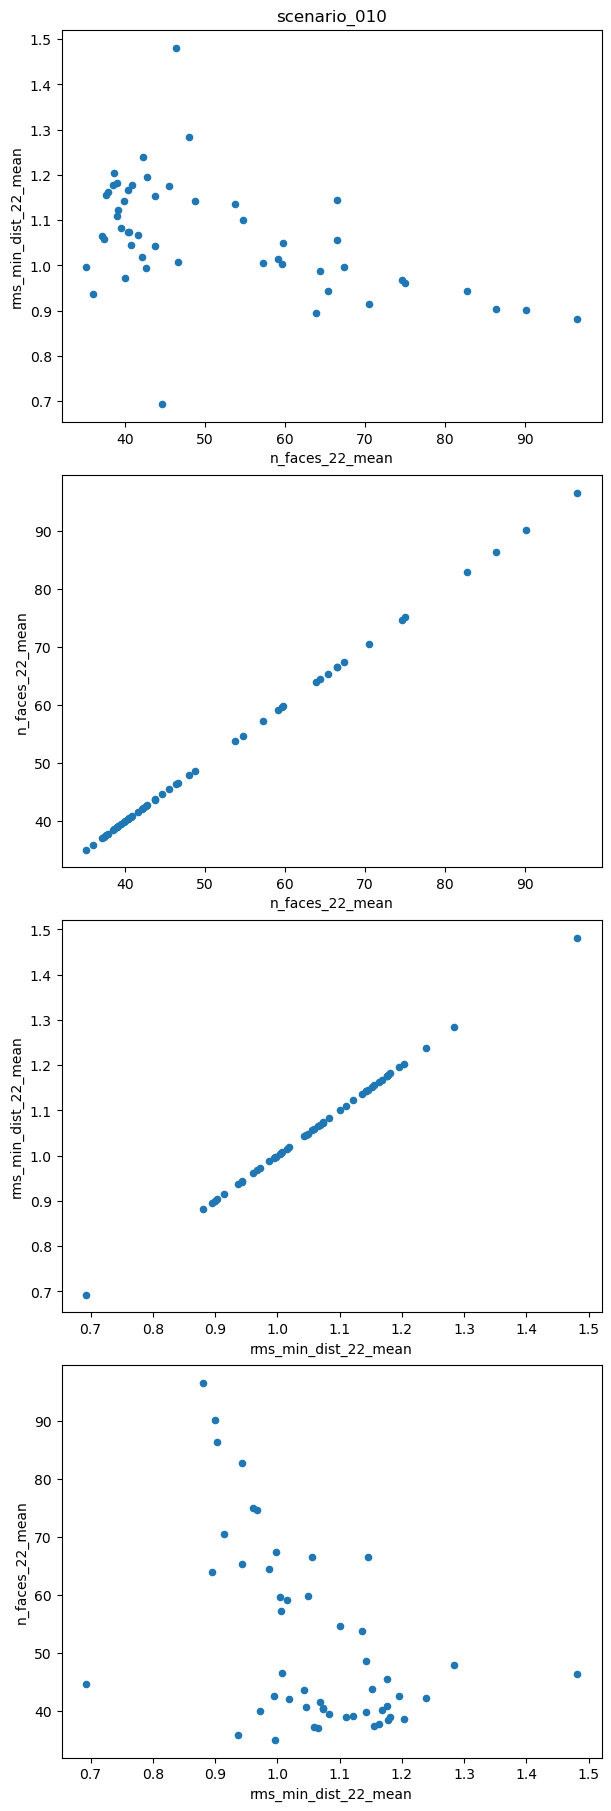

In [93]:
plot_metric_vs_metric_2(eo, ["n_faces_22_mean", "rms_min_dist_22_mean"], ["rms_min_dist_22_mean", "n_faces_22_mean"])

# Pareto front from ChatGPT

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate example data for two metrics (to be minimized)
np.random.seed(42)
num_points = 50
metric1 = np.random.rand(num_points)  # Random values for metric 1
metric2 = 1 - np.sqrt(metric1) + np.random.normal(0, 0.05, num_points)  # Inversely related to metric 1

# Create a DataFrame
df = pd.DataFrame({'metric1': metric1, 'metric2': metric2})

# Function to check Pareto-optimality for minimization
def is_pareto_optimal_min(df):
    values = df.values
    pareto_mask = np.ones(values.shape[0], dtype=bool)  # Initialize all as True

    for i, row in enumerate(values):
        # For minimization, we check if there exists any row with values <= current row
        pareto_mask[i] = not np.any(np.all(values <= row, axis=1) & np.any(values < row, axis=1))

    return pareto_mask

# Compute Pareto-optimal mask
df['pareto_optimal'] = is_pareto_optimal_min(df[['metric1', 'metric2']])

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(df['metric1'], df['metric2'], c='gray', label='Non-optimal Points')
plt.scatter(df.loc[df['pareto_optimal'], 'metric1'], df.loc[df['pareto_optimal'], 'metric2'],
            c='red', label='Pareto-optimal Points')
plt.title('Pareto Front (Minimization of Two Metrics)')
plt.xlabel('Metric 1 (to be minimized)')
plt.ylabel('Metric 2 (to be minimized)')
plt.legend()
plt.grid(True)
plt.show()
